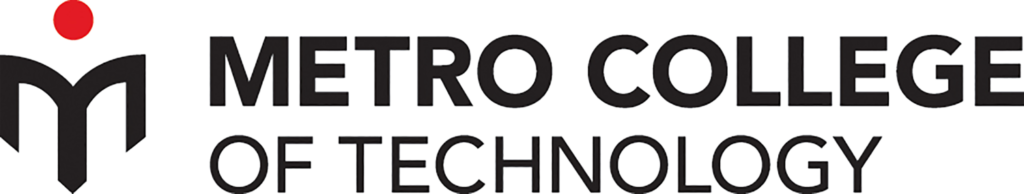




# Logistic Regression Project For Predicting People in a Certain Class

# --------------------------------------------------------- 
# Submitted by:
# Mohammad Monjur-E-Elahi
# Course: R for Data Analytics [DSA06]
# Program: Data Science and Application - Advanced Diploma [6060]
# Metro College of Technology
# Date: 5 March, 2021

# ---------------------------------------------------------
# Introduction:

In this project we will be working with the UCI/Kaggle adult dataset. We aim at predicting if people in the data set belong in a certain class by income, either making <=50k or >50k per year.

We will be performing EDA, Feature Engineering and Visualization while answering relevant questions that we need to ask ourselves in this journey to make the dataset ready for logistic regression model development and evaluation of the same.

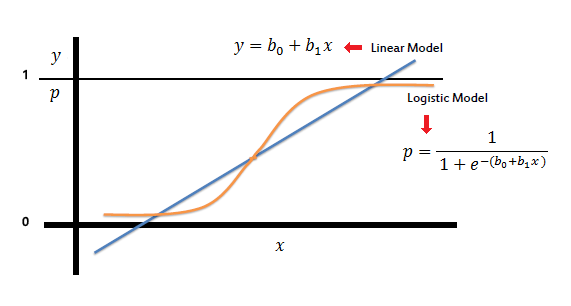

# Getting the Data
Let us read in the adult_sal.csv file and set it to a data frame called adult.

In [13]:
# Let us first check and set the working directory.
getwd()

[1] "C:/Users/ruzdomain/Desktop/R/R_PROJECT"

In [4]:
setwd("C:/Users/ruzdomain/Desktop/R/R_PROJECT")

In [5]:
getwd()

[1] "C:/Users/ruzdomain/Desktop/R/R_PROJECT"

In [16]:
adult <- read.csv('adult_sal.csv')

# Q1:
**We had to ask ourselves whether the imported dataset consists of repeated index or not.**

**Let us check the head and structure of adult.**

In [14]:
head(adult)

X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [15]:
str(adult)

'data.frame':	32584 obs. of  16 variables:
 $ X            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "State-gov" "Self-emp-not-inc" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married-civ-spouse" "Divorced" "Married-civ-spouse" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ countr

**We noticed the index has been repeated. Let us drop this column.**
**We would like to use dplyr library for this purpose.**

In [16]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [17]:
adult <- select(adult,-X)

**Let us check again. We found that it is alright now.**

In [18]:
head(adult)

age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [19]:
str(adult)

'data.frame':	32584 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "State-gov" "Self-emp-not-inc" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married-civ-spouse" "Divorced" "Married-civ-spouse" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : chr  "United-States" "United-States" "U

**Let us now have a look at the summary of the dataset.**

In [20]:
summary(adult)

      age        type_employer          fnlwgt         education        
 Min.   :17.00   Length:32584       Min.   :  12285   Length:32584      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 NA's   :23                         NA's   :23                          
 education_num     marital           occupation        relationship      
 Min.   : 1.00   Length:32584       Length:32584       Length:32584      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                

**Let us now convert the blank data to NA**

In [21]:
adult[adult == ''] <- NA

In [22]:
summary(adult)

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   (Other)         : 2097   Max.   :1484705  
 NA's   :23      NA's            :   23   NA's   :23       
        education     education_num                 marital     
 HS-grad     :10501   Min.   : 1.00   Married-civ-spouse:14976  
 Some-college: 7291   1st Qu.: 9.00   Never-married     :10683  
 Bachelors   : 5355   Median :10.00   Divorced          : 4443  
 Masters     : 1723   Mean   :10.08   Separated         : 1025  
 Assoc-voc   : 1382   3rd Qu.:12.00   Widowed           :  993  
 (Other)     : 6309   Max.   :16.00   (Other)           :  441  
 NA's        :   23   NA's   :23      NA's              :   23  


# Q2:
**We had to ask ourselves whether there are duplicate observations to remove those.**

**Let us check and remove the observations that are duplicates.**

In [22]:
sum(duplicated(adult))

[1] 46

In [23]:
r1 <- which(duplicated(adult))

In [24]:
adult <- adult[-r1,]
summary(adult)

      age        type_employer          fnlwgt         education        
 Min.   :17.00   Length:32538       Min.   :  12285   Length:32538      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.59                      Mean   : 189781                     
 3rd Qu.:48.00                      3rd Qu.: 236993                     
 Max.   :90.00                      Max.   :1484705                     
 NA's   :1                          NA's   :1                           
 education_num     marital           occupation        relationship      
 Min.   : 1.00   Length:32538       Length:32538       Length:32538      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                

# Q3:
**Is there any remaining observation all data for which are NA?**

**Now we have to check whether there are any observations with all values NA so that we can remove those also.**

In [25]:
sum(!complete.cases(adult))

[1] 1

In [26]:
r2 <- which(!complete.cases(adult))

In [27]:
adult[r2,]

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
38,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [28]:
adult <- adult[-r2,]
summary(adult)

      age        type_employer          fnlwgt         education        
 Min.   :17.00   Length:32537       Min.   :  12285   Length:32537      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.59                      Mean   : 189781                     
 3rd Qu.:48.00                      3rd Qu.: 236993                     
 Max.   :90.00                      Max.   :1484705                     
 education_num     marital           occupation        relationship      
 Min.   : 1.00   Length:32537       Length:32537       Length:32537      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

# Q4:
**Do we know the meaning of the variables of the dataset clearly?**

**We researched online to get detail about the variables in the dataset as shown below:**

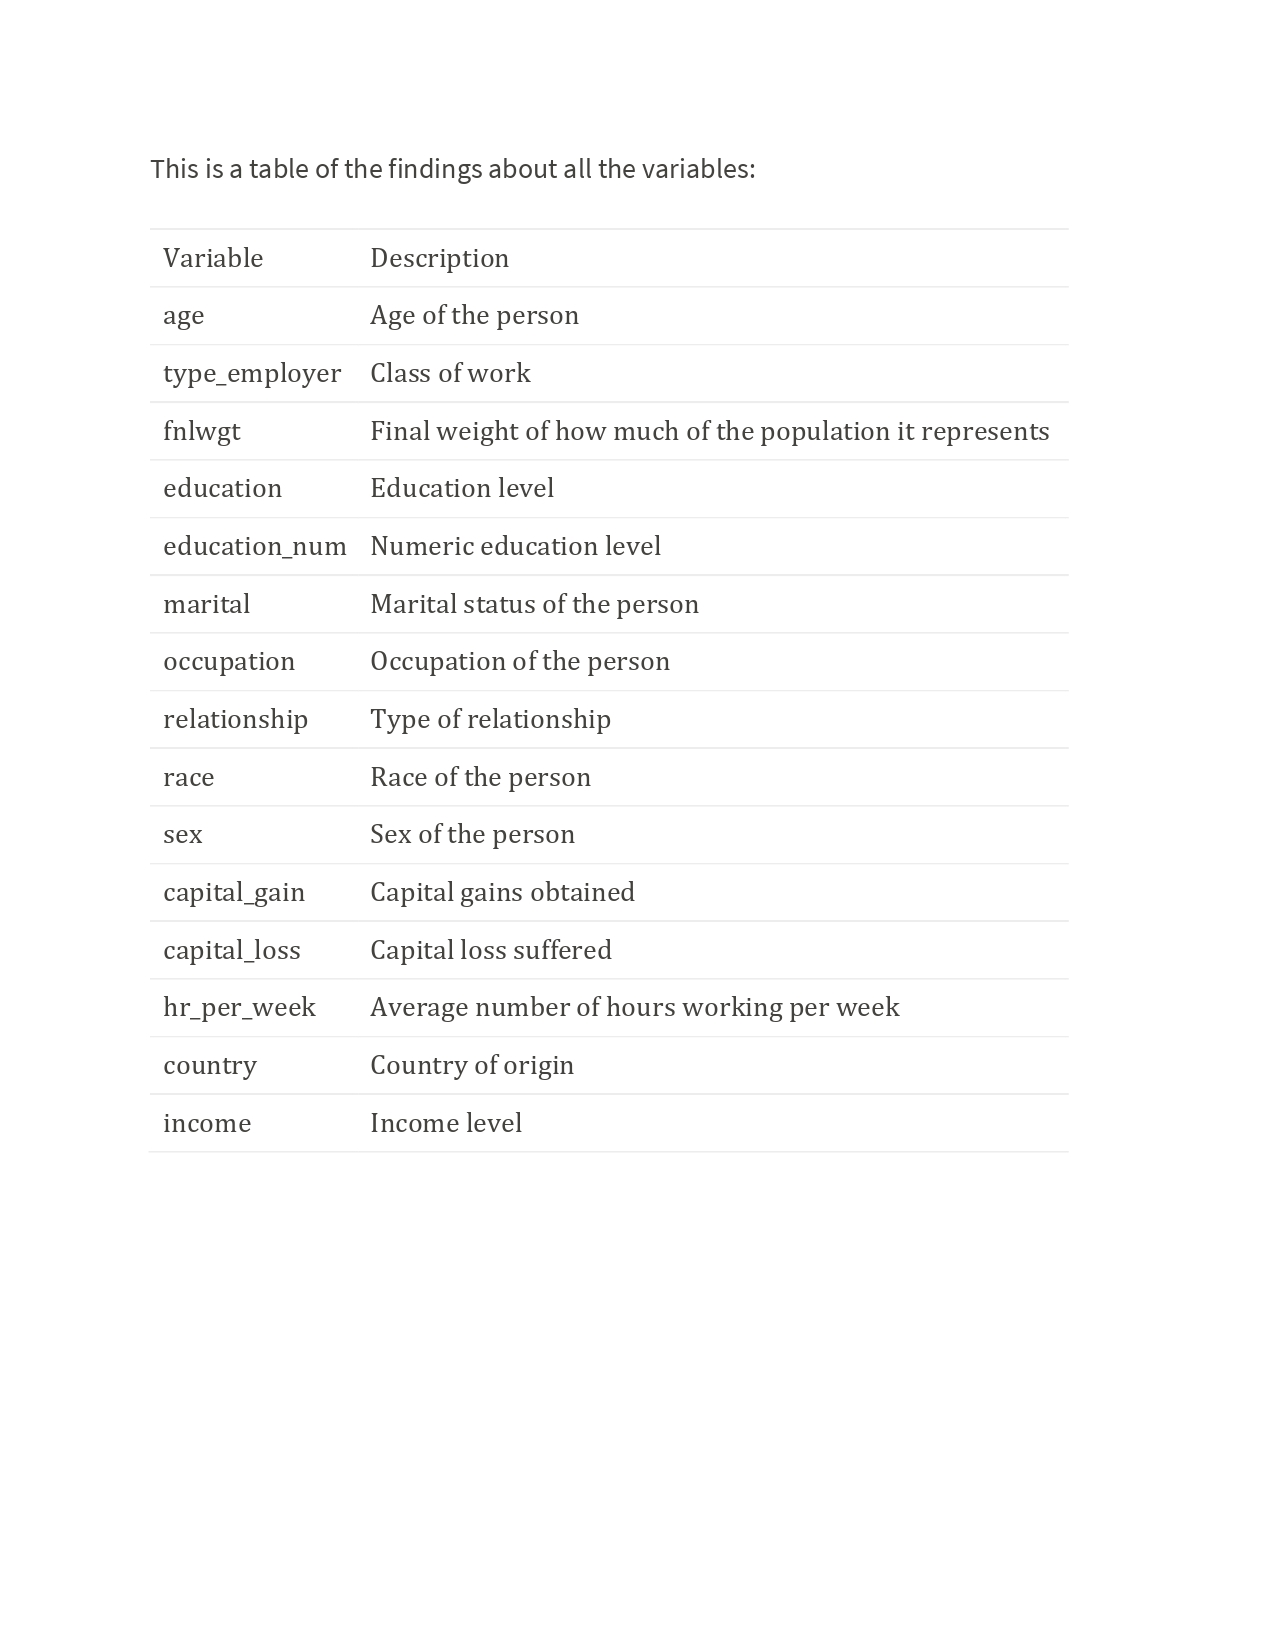

# Q5:

**Do we have missing values(NA) in any of the variables?**

In [29]:
sum(is.na(adult$age))

[1] 0

In [30]:
sum(is.na(adult$type_employer))

[1] 0

In [31]:
sum(is.na(adult$fnlwgt))

[1] 0

In [35]:
sum(is.na(adult$education)) 

[1] 0

In [32]:
sum(is.na(adult$education_num)) 

[1] 0

In [33]:
sum(is.na(adult$marital)) 

[1] 0

In [38]:
sum(is.na(adult$occupation)) 

[1] 0

In [34]:
sum(is.na(adult$relationship)) 

[1] 0

In [35]:
sum(is.na(adult$race))

[1] 0

In [41]:
sum(is.na(adult$sex))

[1] 0

In [36]:
sum(is.na(adult$capital_gain))

[1] 0

In [37]:
sum(is.na(adult$capital_loss))

[1] 0

In [38]:
sum(is.na(adult$hr_per_week))

[1] 0

In [39]:
sum(is.na(adult$country))

[1] 0

In [40]:
sum(is.na(adult$income))

[1] 0

**We found out that we did not have NA values in any of the variables.**

# Q6:
**Do we need to address other types of missing data?**

In [41]:
summary(adult)

      age        type_employer          fnlwgt         education        
 Min.   :17.00   Length:32537       Min.   :  12285   Length:32537      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.59                      Mean   : 189781                     
 3rd Qu.:48.00                      3rd Qu.: 236993                     
 Max.   :90.00                      Max.   :1484705                     
 education_num     marital           occupation        relationship      
 Min.   : 1.00   Length:32537       Length:32537       Length:32537      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

**From the above summary we see that the category marked as "?" in the type_employer andcountry column needs to be dealt with as missing values.**

**Let us use table() to check out the frequency of the type_employer and country columns and convert the "?" values to NA.**

In [42]:
table(adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22673             1116             2540             1298 
     Without-pay 
              14 

In [43]:
table(adult$country)


                         ?                   Cambodia 
                       582                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         62 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

In [44]:
adult[adult == '?'] <- NA

**Let us check whether the conversion has taken place or not.**

In [46]:
table(adult$type_employer)


     Federal-gov        Local-gov     Never-worked          Private 
             960             2093                7            22673 
    Self-emp-inc Self-emp-not-inc        State-gov      Without-pay 
            1116             2540             1298               14 

In [47]:
table(adult$country)


                  Cambodia                     Canada 
                        19                        121 
                     China                   Columbia 
                        75                         59 
                      Cuba         Dominican-Republic 
                        95                         70 
                   Ecuador                El-Salvador 
                        28                        106 
                   England                     France 
                        90                         29 
                   Germany                     Greece 
                       137                         29 
                 Guatemala                      Haiti 
                        62                         44 
        Holand-Netherlands                   Honduras 
                         1                         13 
                      Hong                    Hungary 
                        20                         13 
         

**The conversion is done. But to remove the "?" category let us refactor these two columns.**

In [48]:
adult$type_employer <- sapply(adult$type_employer,factor)

In [49]:
adult$country <- sapply(adult$country,factor)

**Now let us check again.**

In [50]:
table(adult$type_employer)


       State-gov Self-emp-not-inc          Private      Federal-gov 
            1298             2540            22673              960 
       Local-gov     Self-emp-inc      Without-pay     Never-worked 
            2093             1116               14                7 

In [51]:
table(adult$country)


             United-States                       Cuba 
                     29153                         95 
                   Jamaica                      India 
                        81                        100 
                    Mexico                      South 
                       639                         80 
               Puerto-Rico                   Honduras 
                       114                         13 
                   England                     Canada 
                        90                        121 
                   Germany                       Iran 
                       137                         43 
               Philippines                      Italy 
                       198                         73 
                    Poland                   Columbia 
                        60                         59 
                  Cambodia                   Thailand 
                        19                         18 
         

**Looks like it is done.**

**Let us install the Amelia package and call the Amelia library to visualize the map for the missing values.**

In [52]:
install.packages("Amelia")

package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ruzdomain\AppData\Local\Temp\RtmpOMYOW3\downloaded_packages


In [53]:
library(Amelia)

Warning message:
"package 'Amelia' was built under R version 3.6.3"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


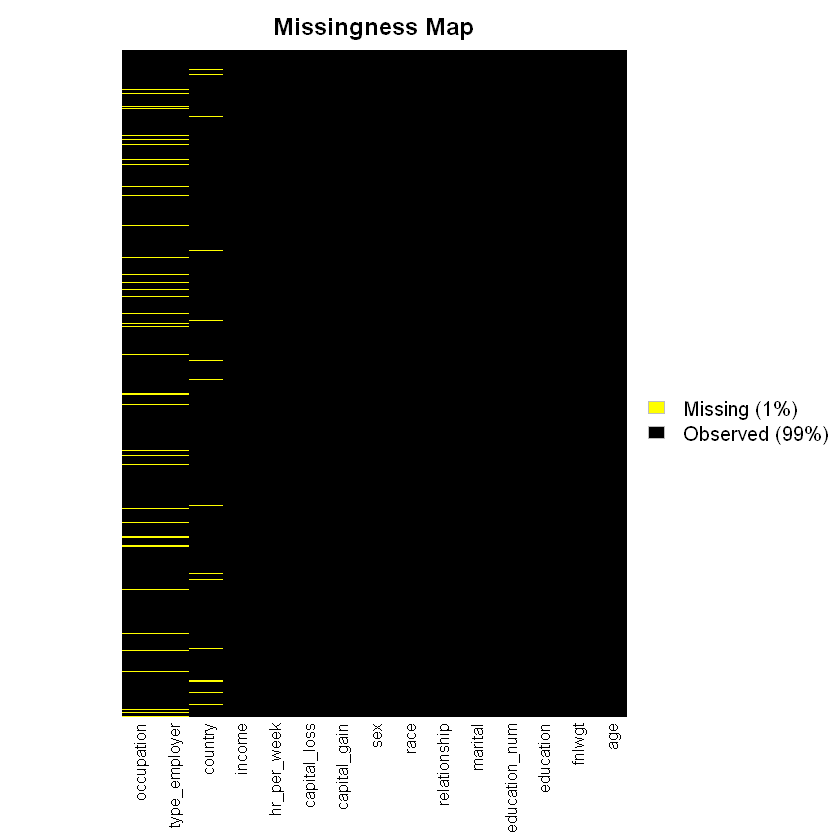

In [57]:
missmap(adult,y.at=c(1),y.labels = c(''),col=c('yellow','black'))

**It is worth mentioning that somehow in the summary result the categroy with "?" did not show up but as we converted "?" to NA for the whole dataset, it worked and captured for the occupationm column as well.**

**Let us use na.omit() to omit NA data from the adult data frame. Actually, it really depends on the situation and our data to judge whether or not this is a good decision. We shouldn't always just drop NA values.**

In [58]:
adult <- na.omit(adult)

**Now, let us check the map again to be confirmed.**

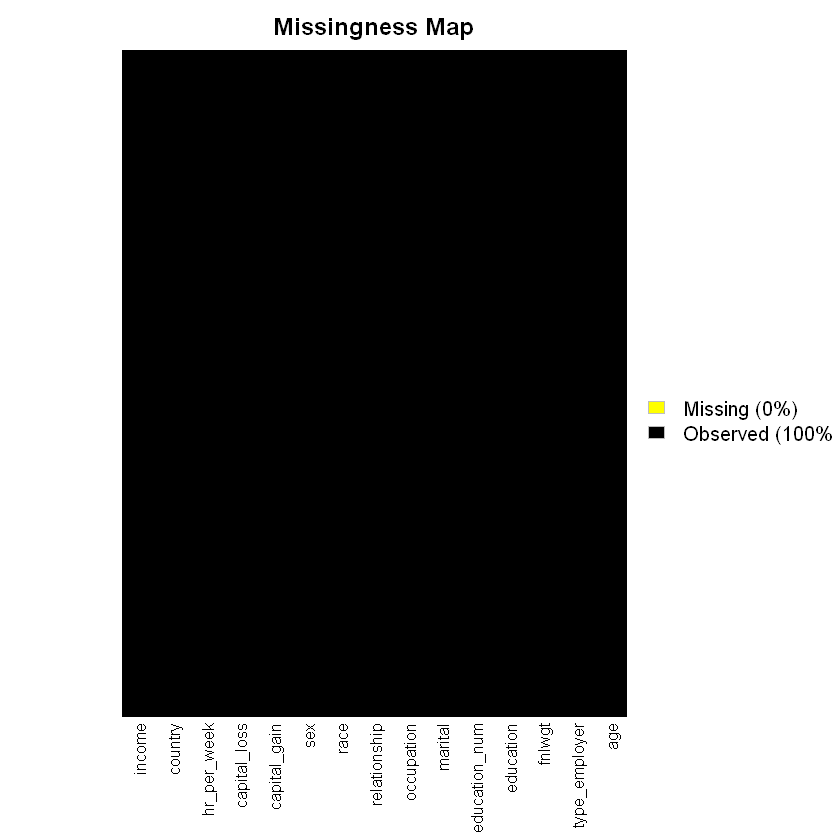

In [59]:
missmap(adult,y.at=c(1),y.labels = c(''),col=c('yellow','black'))

**It worked!**

# Feature Engineering
**We would now explore whether we need to do feature engineering especially on our categorical variables to reduce the number of categories in a meaningful way.**

# Q7:
**Do we need to perform feature engineering on the type_employer column?**

In [60]:
table(adult$type_employer)


       State-gov Self-emp-not-inc          Private      Federal-gov 
            1279             2498            22264              943 
       Local-gov     Self-emp-inc      Without-pay     Never-worked 
            2067             1074               14                0 

**We can combine Never-worked and Without-pay into a single group called "Unemployed". Let us create a function to do the job ofr us.**

In [61]:
unemp <- function(job){
    job <- as.character(job)
    if (job=='Never-worked' | job=='Without-pay'){
        return('Unemployed')
    }else{
        return(job)
    }
}

In [62]:
adult$type_employer <- sapply(adult$type_employer,unemp)

In [63]:
table(adult$type_employer)


     Federal-gov        Local-gov          Private     Self-emp-inc 
             943             2067            22264             1074 
Self-emp-not-inc        State-gov       Unemployed 
            2498             1279               14 

**Let us combine State and Local gov jobs(Local-gov and State-gov) into a category called SL-gov and combine self-employed jobs(Self-emp-inc and Self-emp-not-inc) into a category called self-emp. Let us create the below function for this purpose**

In [64]:
group_emp <- function(job){
    if (job=='Local-gov' | job=='State-gov'){
        return('SL-gov')
    }else if (job=='Self-emp-inc' | job=='Self-emp-not-inc'){
        return('self-emp')
    }else{
        return(job)
    }
}

**It is worth mentioning that we already converted the variable type_employer using the first function and hence we do not use that in case of the second function.**

In [65]:
adult$type_employer <- sapply(adult$type_employer,group_emp)

In [66]:
table(adult$type_employer)


Federal-gov     Private    self-emp      SL-gov  Unemployed 
        943       22264        3572        3346          14 

# Q8:
**Do we need to perform feature engineering on the education and education_num columns?**

In [68]:
table(adult$education)


        10th         11th         12th      1st-4th      5th-6th      7th-8th 
         820         1048          377          149          287          556 
         9th   Assoc-acdm    Assoc-voc    Bachelors    Doctorate      HS-grad 
         455         1008         1307         5042          375         9834 
     Masters    Preschool  Prof-school Some-college 
        1626           44          542         6669 

In [69]:
summary(adult$education)

   Length     Class      Mode 
    30139 character character 

**Now let us use the below function to convert the cateries in the education columns to smaller and releavent categories.**

**Let us convert the categories as outlined below:**



**Upto_Primary** --> Preschool, 1, 1st-4th, 5th-6th

**UptoInter** --> 7th-8th

**Upto_HS_Grad** --> 9th, 10th, 11th, 12th, HS-grad

**Post_HS-School** --> Assoc-acdm, Assoc-voc, Prof-school, Some-college

In [70]:
edugroup <- function(edu){
  edu <- as.character(edu)
  if (edu == 'Preschool' | edu == '1' | edu =='1st-4th' | edu =='5th-6th'){
    return('Upto_Primary')
  }else if ( edu == '7th-8th'){
    return('UptoInter')
    } else if (edu == '9th' | edu == '10th' | edu == '11th' | edu == '12th' | edu == 'HS-grad'){
      return('Upto_HS_Grad')
    }else if (edu == 'Assoc-acdm' | edu == 'Assoc-voc' | edu == 'Prof-school' | edu == 'Some-college' ){
      return('Post_HS-School')
    }else{
    return(edu)
  }
}

In [71]:
adult$education <- sapply(adult$education,edugroup)

In [72]:
table(adult$education)


     Bachelors      Doctorate        Masters Post_HS-School   Upto_HS_Grad 
          5042            375           1626           9526          12534 
  Upto_Primary      UptoInter 
           480            556 

# Q9:
**Do we need to perform feature engineering on the marital columns?**

In [73]:
table(adult$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4212                    21                 14059 
Married-spouse-absent         Never-married             Separated 
                  370                  9711                   939 
              Widowed 
                  827 

In [74]:
summary(adult$marital)

   Length     Class      Mode 
    30139 character character 

In [75]:
which((adult$marital == "1"))

integer(0)

**Let us reduce these categories in to the below three groups:**

**Married, Not-Married and Never-Married**

In [76]:
group_marital <- function(mar){
    mar <- as.character(mar)
    
    # Not-Married
    if (mar=='Separated' | mar=='Divorced' | mar=='Widowed'){
        return('Not-Married')
    
    # Never-Married   
    }else if(mar=='Never-married'){
        return(mar)
    
     #Married
    }else{
        return('Married')
    }
}

In [77]:
adult$marital <- sapply(adult$marital,group_marital)
table(adult$marital)


      Married Never-married   Not-Married 
        14450          9711          5978 

# Q10:
**Do we need to perform feature engineering on the country columns?**

In [78]:
table(adult$country)


             United-States                       Cuba 
                     27487                         92 
                   Jamaica                      India 
                        80                        100 
                    Mexico                      South 
                       606                         71 
               Puerto-Rico                   Honduras 
                       109                         12 
                   England                     Canada 
                        86                        107 
                   Germany                       Iran 
                       128                         42 
               Philippines                      Italy 
                       188                         68 
                    Poland                   Columbia 
                        56                         56 
                  Cambodia                   Thailand 
                        18                         17 
         

**Let us group the countries as per the regions as much as possible.**

In [79]:
levels(adult$country)

[1] "United-States"              "Cuba"                      
 [3] "Jamaica"                    "India"                     
 [5] "Mexico"                     "South"                     
 [7] "Puerto-Rico"                "Honduras"                  
 [9] "England"                    "Canada"                    
[11] "Germany"                    "Iran"                      
[13] "Philippines"                "Italy"                     
[15] "Poland"                     "Columbia"                  
[17] "Cambodia"                   "Thailand"                  
[19] "Ecuador"                    "Laos"                      
[21] "Taiwan"                     "Haiti"                     
[23] "Portugal"                   "Dominican-Republic"        
[25] "El-Salvador"                "France"                    
[27] "Guatemala"                  "China"                     
[29] "Japan"                      "Yugoslavia"                
[31] "Peru"                       "Outlying-US(Guam-USVI-etc)"
[33] "Scotland"                   "Trinadad&Tobago"           
[35] "Greece"                     "Nicaragua"                 
[37] "Vietnam"                    "Hong"                      
[39] "Ireland"                    "Hungary"                   
[41] "Holand-Netherlands"

**Let us use the below function to do the job for us after grouping the countries in different reasons.**

In [80]:
Asia <- c('China','Hong','India','Iran','Cambodia','Japan', 'Laos' ,
          'Philippines' ,'Vietnam' ,'Taiwan', 'Thailand')

North.America <- c('Canada','United-States','Puerto-Rico' )

Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin.and.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala','Haiti','Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                            'Jamaica','Trinadad&Tobago')
Other <- c('South')

In [81]:
group_country <- function(ctry){
    if (ctry %in% Asia){
        return('Asia')
    }else if (ctry %in% North.America){
        return('North.America')
    }else if (ctry %in% Europe){
        return('Europe')
    }else if (ctry %in% Latin.and.South.America){
        return('Latin.and.South.America')
    }else{
        return('Other')      
    }
}

In [82]:
adult$country <- sapply(adult$country,group_country)

In [83]:
table(adult$country)


                   Asia                  Europe Latin.and.South.America 
                    634                     493                    1238 
          North.America                   Other 
                  27703                      71 

**Let us change the column name country to region since it doesn't repersent countries directly rather it represents the region.**

In [84]:
names(adult)[names(adult)=="country"] <- "region"

In [85]:
table(adult$region)


                   Asia                  Europe Latin.and.South.America 
                    634                     493                    1238 
          North.America                   Other 
                  27703                      71 

**Let us refactor the columns that we performed feature engineering on.**

In [87]:
adult$type_employer <- sapply(adult$type_employer,factor)
adult$region <- sapply(adult$region,factor)
adult$marital <- sapply(adult$marital,factor)
adult$occupation <- sapply(adult$occupation,factor)
adult$education <- sapply(adult$education,factor)

**Let us check other categorical columns for any potential feature engineering.**

In [90]:
table(adult$occupation)


     Adm-clerical   Exec-managerial Handlers-cleaners    Prof-specialty 
             3719              3991              1349              4034 
    Other-service             Sales  Transport-moving   Farming-fishing 
             3209              3584              1572               987 
Machine-op-inspct      Tech-support      Craft-repair   Protective-serv 
             1964               911              4025               644 
     Armed-Forces   Priv-house-serv 
                9               141 

In [91]:
table(adult$relationship)


       Husband  Not-in-family Other-relative      Own-child      Unmarried 
         12457           7714            889           4462           3211 
          Wife 
          1406 

In [92]:
table(adult$race)


Amer-Indian-Eskimo Asian-Pac-Islander              Black              Other 
               286                894               2816                231 
             White 
             25912 

In [93]:
table(adult$sex)


Female   Male 
  9773  20366 

In [94]:
table(adult$income)


<=50K  >50K 
22633  7506 

**We decided not to work further on these columns for the time being but there is always scopes for trying those as well.**

In [95]:
str(adult)

'data.frame':	30139 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 7 levels "Bachelors","Upto_HS_Grad",..: 1 1 2 2 1 3 2 2 3 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 2 3 3 4 2 5 2 4 2 ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ region       : Factor w/ 5 levels "North.America",..: 1 1

# Q11:
**Do we need to analyze the numerical columns to find out the any possible outliers to deal with those?**

In [96]:
summary(adult)

      age            type_employer       fnlwgt                 education    
 Min.   :17.00   SL-gov     : 3346   Min.   :  13769   Bachelors     : 5042  
 1st Qu.:28.00   self-emp   : 3572   1st Qu.: 117628   Upto_HS_Grad  :12534  
 Median :37.00   Private    :22264   Median : 178417   Masters       : 1626  
 Mean   :38.44   Federal-gov:  943   Mean   : 189795   Post_HS-School: 9526  
 3rd Qu.:47.00   Unemployed :   14   3rd Qu.: 237605   UptoInter     :  556  
 Max.   :90.00                       Max.   :1484705   Doctorate     :  375  
                                                       Upto_Primary  :  480  
 education_num            marital                occupation  
 Min.   : 1.00   Never-married: 9711   Prof-specialty :4034  
 1st Qu.: 9.00   Married      :14450   Craft-repair   :4025  
 Median :10.00   Not-Married  : 5978   Exec-managerial:3991  
 Mean   :10.12                         Adm-clerical   :3719  
 3rd Qu.:13.00                         Sales          :3584  
 Max

**We clearly understand that there are impossible outliers in the hr_per_week column.**

**Let us call library dplyr and find out how manay values are the in the hr_per_week column and whether is there any trend of this outliers.**

In [97]:
library(dplyr)

In [98]:
adult %>% select(hr_per_week, income) %>% filter(hr_per_week > 100)

hr_per_week,income
400,>50K
550,>50K
500,>50K
280,<=50K
350,<=50K
160,<=50K
180,<=50K
470,>50K
550,<=50K
400,<=50K


**We can see that most probably one extra digit of "0" is somehow added to these data mistakenly. So, we will try to scale down these vlaues by a factor of 10.**

In [99]:
adult$hr_per_week<-ifelse(adult$hr_per_week > 100, adult$hr_per_week/10, adult$hr_per_week)

In [100]:
summary(adult)

      age            type_employer       fnlwgt                 education    
 Min.   :17.00   SL-gov     : 3346   Min.   :  13769   Bachelors     : 5042  
 1st Qu.:28.00   self-emp   : 3572   1st Qu.: 117628   Upto_HS_Grad  :12534  
 Median :37.00   Private    :22264   Median : 178417   Masters       : 1626  
 Mean   :38.44   Federal-gov:  943   Mean   : 189795   Post_HS-School: 9526  
 3rd Qu.:47.00   Unemployed :   14   3rd Qu.: 237605   UptoInter     :  556  
 Max.   :90.00                       Max.   :1484705   Doctorate     :  375  
                                                       Upto_Primary  :  480  
 education_num            marital                occupation  
 Min.   : 1.00   Never-married: 9711   Prof-specialty :4034  
 1st Qu.: 9.00   Married      :14450   Craft-repair   :4025  
 Median :10.00   Not-Married  : 5978   Exec-managerial:3991  
 Mean   :10.12                         Adm-clerical   :3719  
 3rd Qu.:13.00                         Sales          :3584  
 Max

# Q12:
**What is the distribution of target?**

**Our target here is income and since it is a categorical variable, in univaraite analysis for summarization we will find frequency and for visualization I would like to plot: pie chart or barchart.** 

In [101]:
tbl <-table(adult$income)
tbl


<=50K  >50K 
22633  7506 

In [102]:
library(ggplot2)

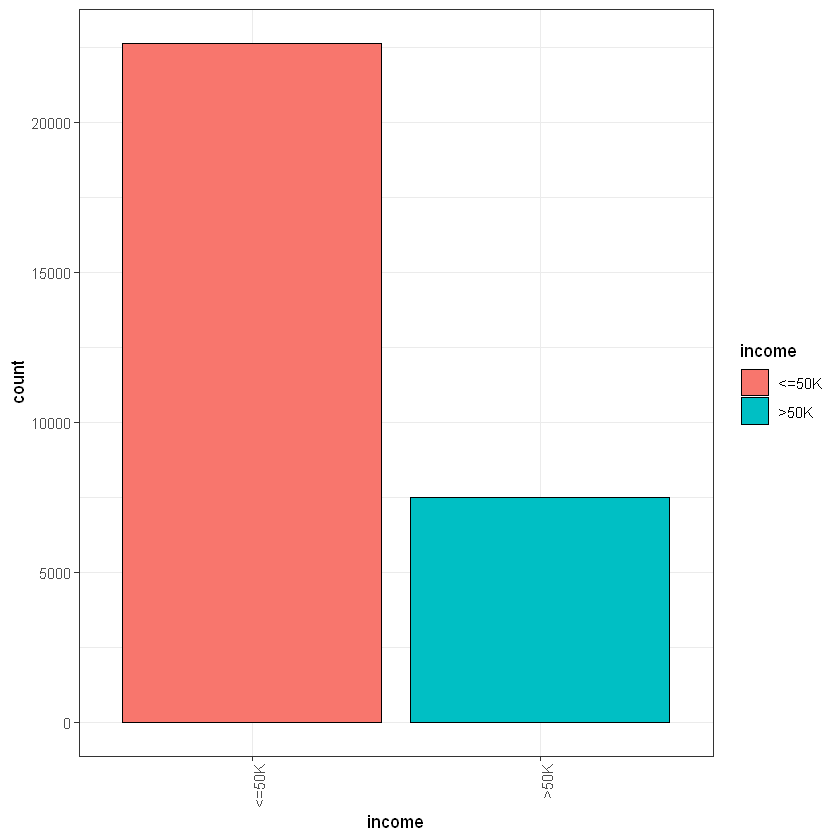

In [103]:
ggplot(adult,aes(income)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q13:
**What is the distribution of age?**

In [104]:
summary(adult$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.44   47.00   90.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


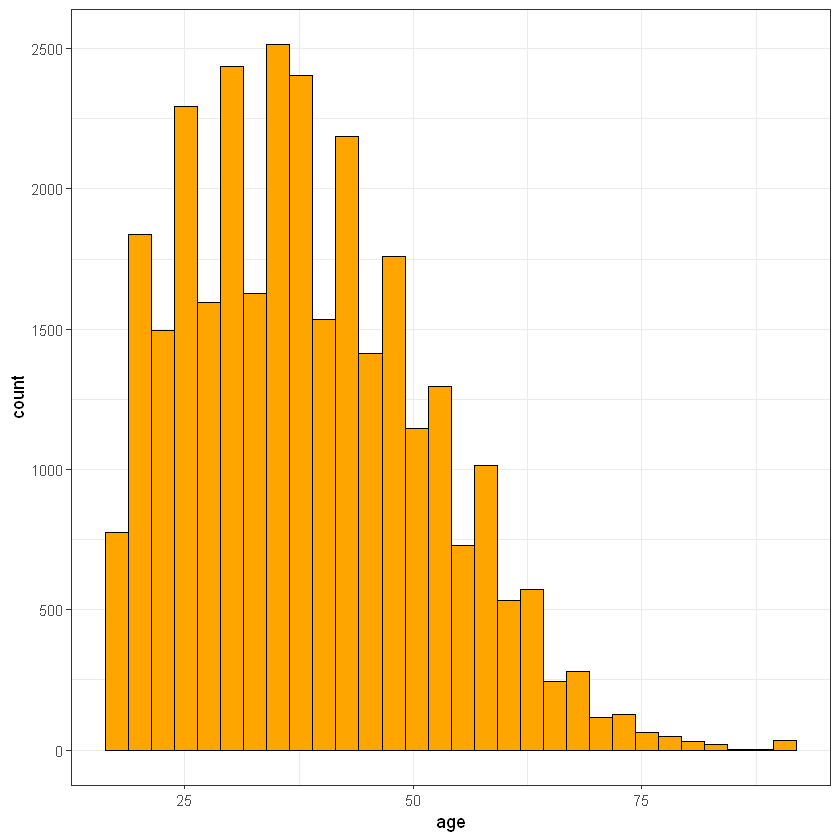

In [105]:
ggplot(adult,aes(age)) + geom_histogram(aes(fill=age), color='black', fill='orange') + theme_bw()

# Q14:
**What is distribution of type_employer?**

In [106]:
tbl1 <-table(adult$type_employer)
tbl1


     SL-gov    self-emp     Private Federal-gov  Unemployed 
       3346        3572       22264         943          14 

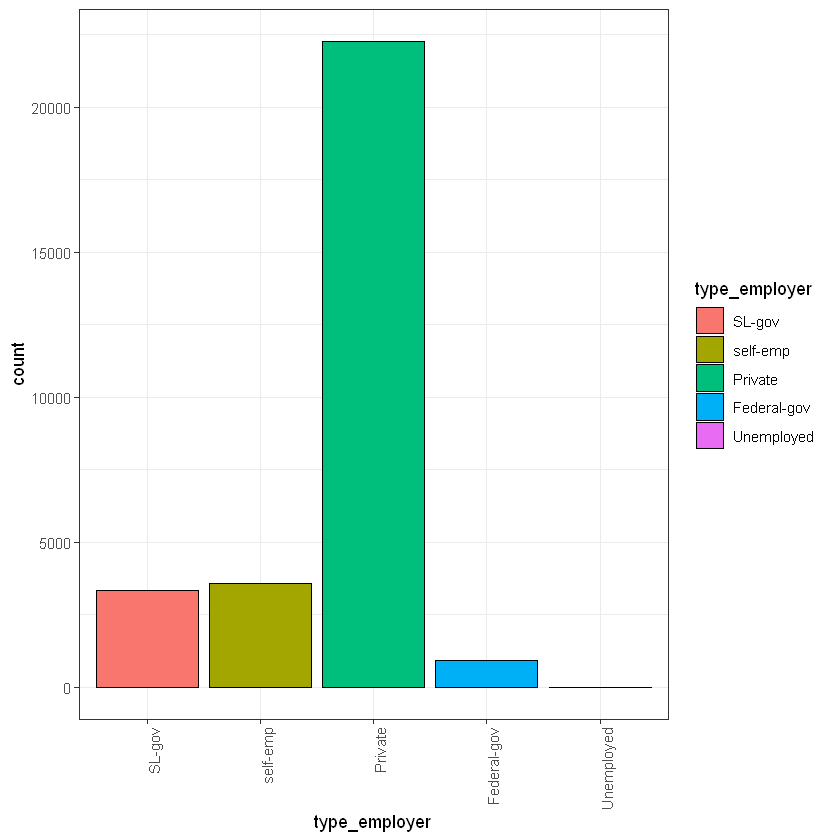

In [107]:
ggplot(adult,aes(type_employer)) + geom_bar(aes(fill=type_employer),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q15:
**What is distribution of fnlwgt?**

In [108]:
summary(adult$fnlwgt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13769  117628  178417  189795  237605 1484705 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


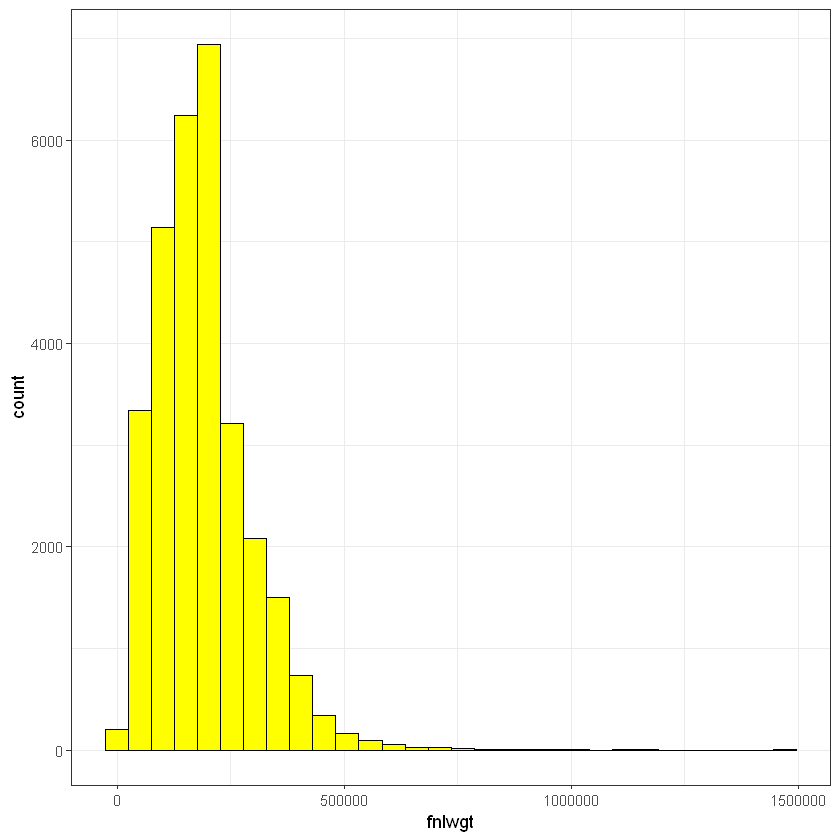

In [109]:
ggplot(adult,aes(fnlwgt)) + geom_histogram(aes(fill=fnlwgt), color='black', fill='yellow') + theme_bw()

# Q16:
**What is the distribution of education?**

In [110]:
tbl2 <-table(adult$education)
tbl2


     Bachelors   Upto_HS_Grad        Masters Post_HS-School      UptoInter 
          5042          12534           1626           9526            556 
     Doctorate   Upto_Primary 
           375            480 

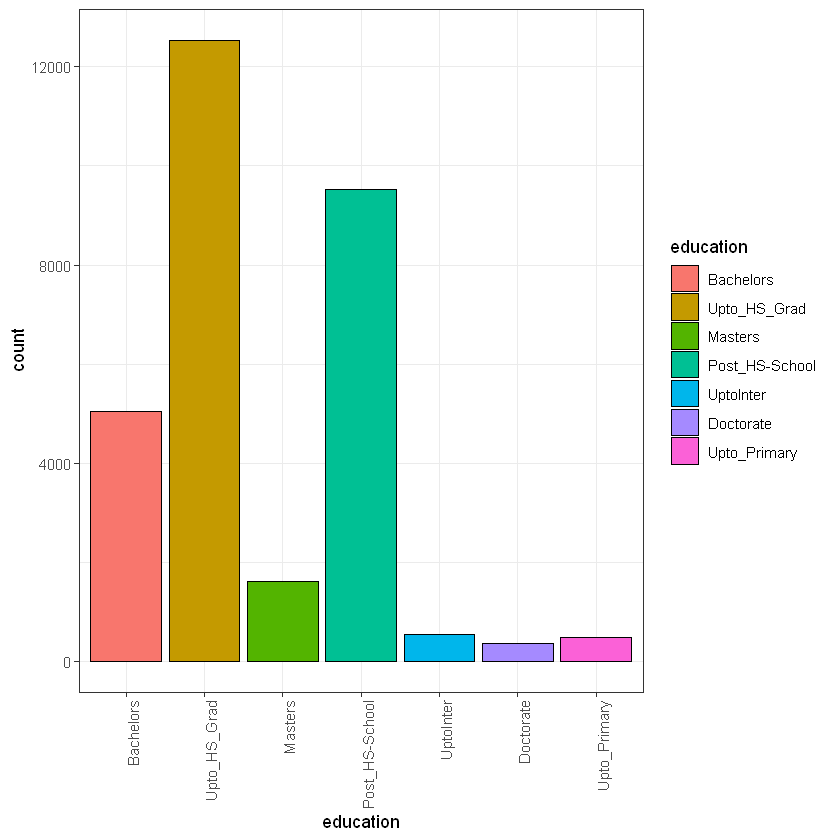

In [111]:
ggplot(adult,aes(education)) + geom_bar(aes(fill=education),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q17:
**What is the distribution of education_num?**

In [112]:
summary(adult$education_num)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.12   13.00   16.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


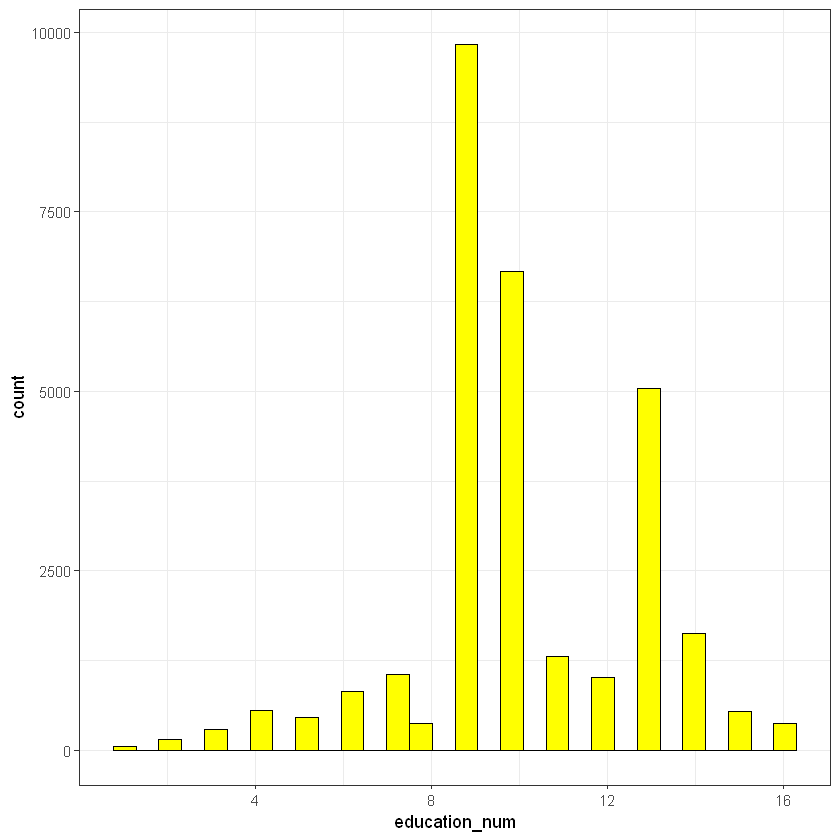

In [113]:
ggplot(adult,aes(education_num)) + geom_histogram(aes(fill=education_num), color='black', fill='yellow') + theme_bw()

# Q18:
**What is the distribution of marital status?**

In [114]:
tbl3 <-table(adult$marital)
tbl3


Never-married       Married   Not-Married 
         9711         14450          5978 

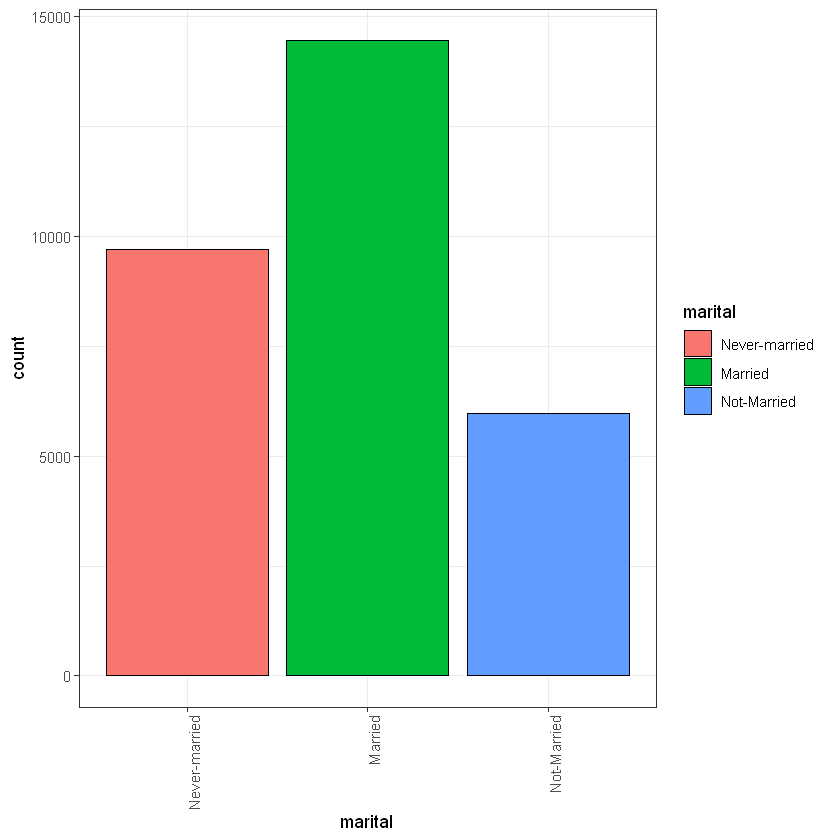

In [115]:
ggplot(adult,aes(marital)) + geom_bar(aes(fill=marital),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q19:
**What is the distribution of occupation?**

In [116]:
tbl4 <-table(adult$occupation)
tbl4


     Adm-clerical   Exec-managerial Handlers-cleaners    Prof-specialty 
             3719              3991              1349              4034 
    Other-service             Sales  Transport-moving   Farming-fishing 
             3209              3584              1572               987 
Machine-op-inspct      Tech-support      Craft-repair   Protective-serv 
             1964               911              4025               644 
     Armed-Forces   Priv-house-serv 
                9               141 

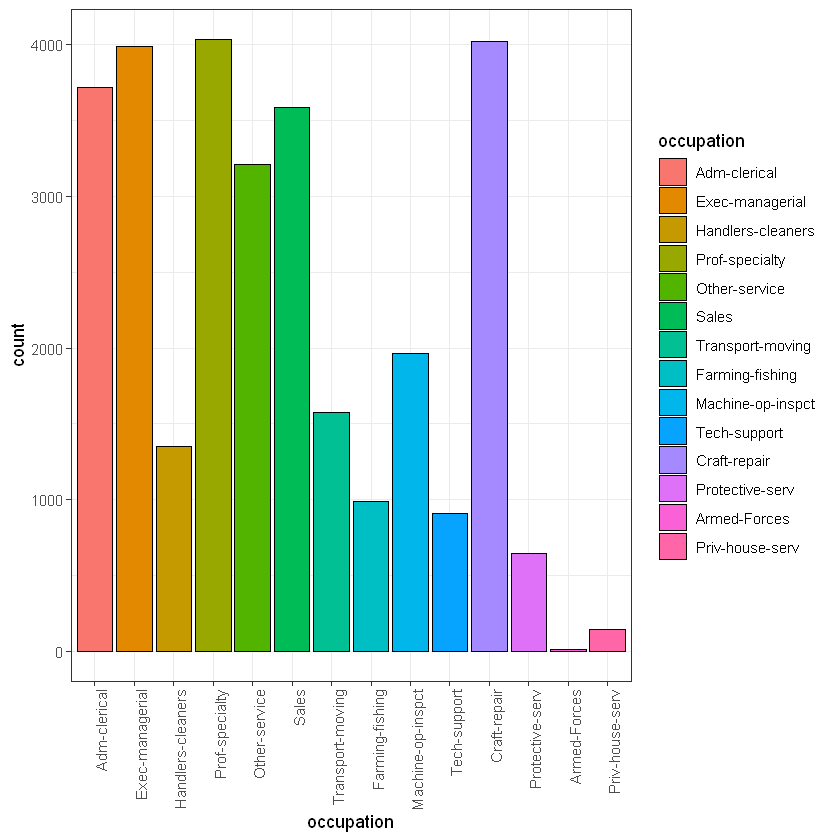

In [117]:
ggplot(adult,aes(occupation)) + geom_bar(aes(fill=occupation),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q20:
**What is the distribution of relationship?**

In [118]:
tbl5 <-table(adult$relationship)
tbl5


       Husband  Not-in-family Other-relative      Own-child      Unmarried 
         12457           7714            889           4462           3211 
          Wife 
          1406 

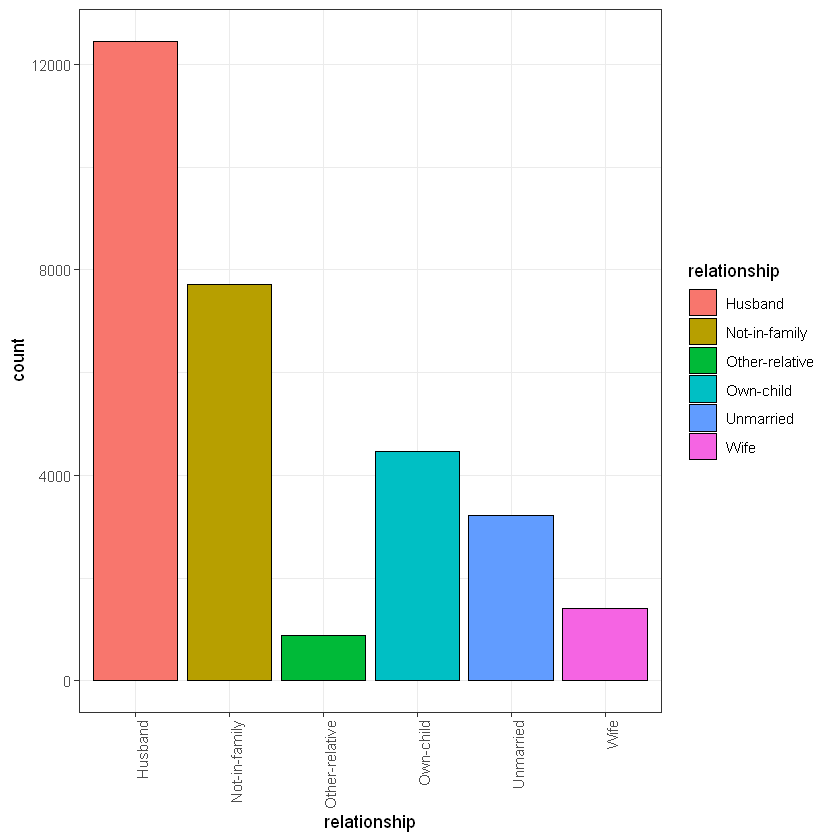

In [119]:
ggplot(adult,aes(relationship)) + geom_bar(aes(fill=relationship),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q21:
**What is the distribution of race?**

In [120]:
tbl6 <-table(adult$race)
tbl6


Amer-Indian-Eskimo Asian-Pac-Islander              Black              Other 
               286                894               2816                231 
             White 
             25912 

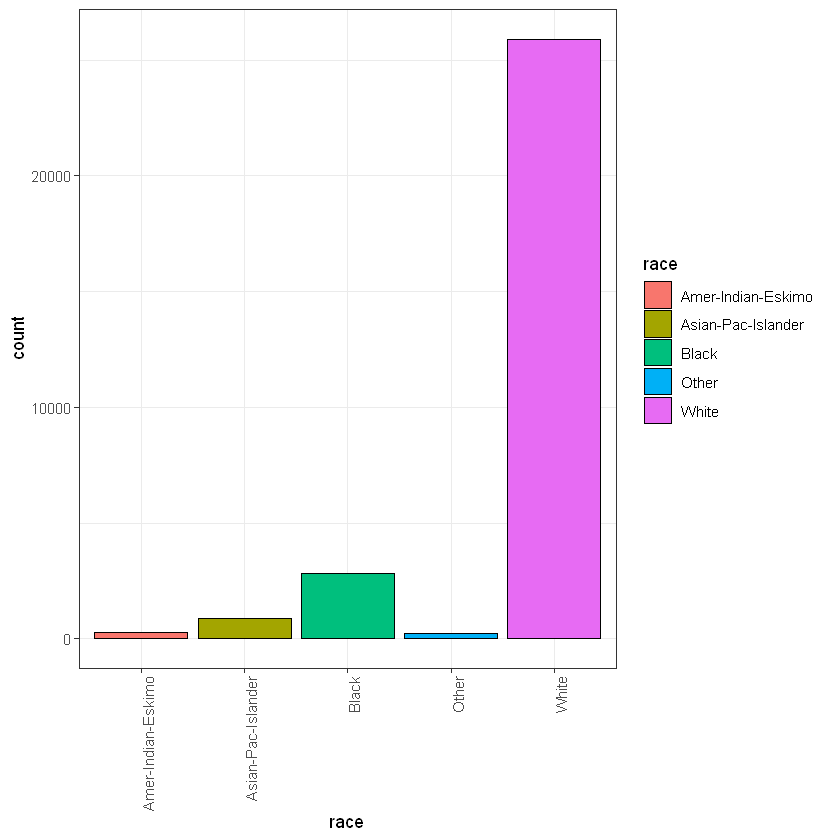

In [121]:
ggplot(adult,aes(race)) + geom_bar(aes(fill=race),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q22:
**What is the distribution of sex?**

In [122]:
tbl7 <-table(adult$sex)
tbl7


Female   Male 
  9773  20366 

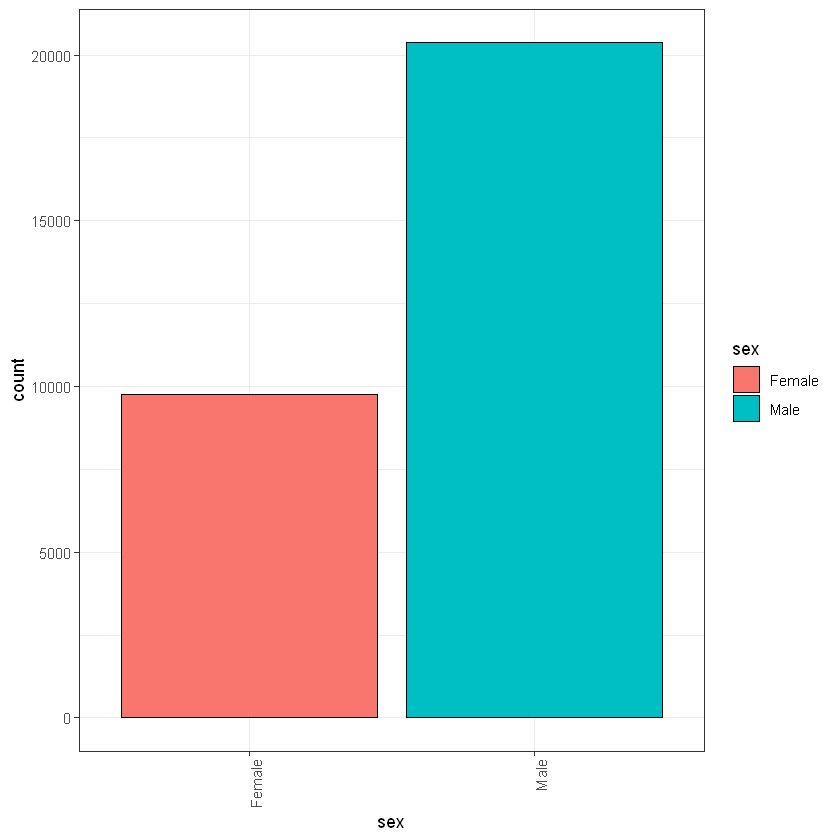

In [123]:
ggplot(adult,aes(sex)) + geom_bar(aes(fill=sex),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q23:
**What is the distribution of hr_per_week?**

In [124]:
summary(adult$hr_per_week)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.93   45.00   99.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


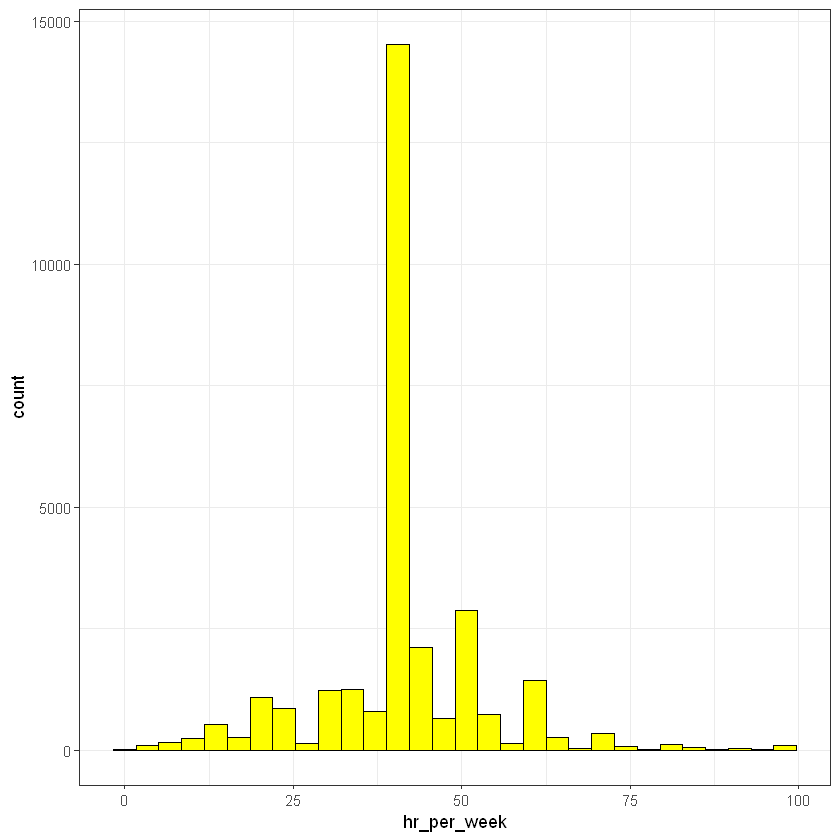

In [125]:
ggplot(adult,aes(hr_per_week)) + geom_histogram(aes(fill=hr_per_week), color='black', fill='yellow') + theme_bw()

# Q24:
**What is the distribution of region?**

In [126]:
tbl8 <-table(adult$region)
tbl8


          North.America Latin.and.South.America                    Asia 
                  27703                    1238                     634 
                 Europe                   Other 
                    493                      71 

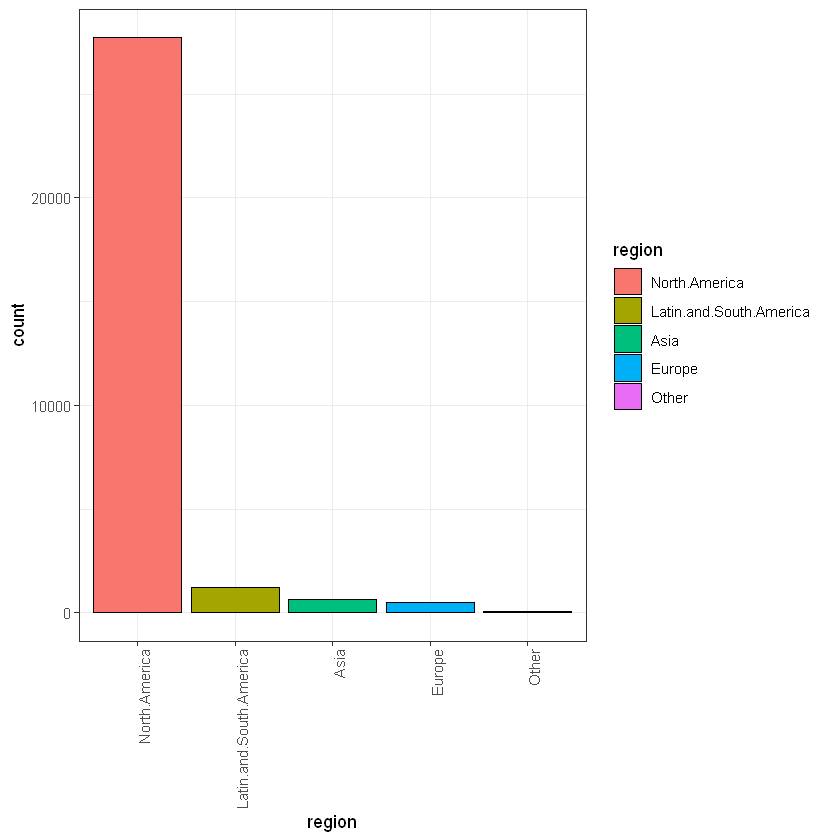

In [127]:
ggplot(adult,aes(region)) + geom_bar(aes(fill=region),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q25:
**What is the statistically significant association between age and income?**

In [169]:
agg1 <- aggregate(age ~ income, adult , mean)
agg1
names(agg1) <- c("Income Group","Mean of Age")
agg1

income,age
<=50K,36.61158
>50K,43.96017


Income Group,Mean of Age
<=50K,36.61158
>50K,43.96017


**t-test of independence between income and age.**

In [190]:
t.test(age ~ income, data=adult)


	Welch Two Sample t-test

data:  age by income
t = -49.477, df = 16694, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.639704 -7.057457
sample estimates:
mean in group <=50K  mean in group >50K 
           36.61158            43.96017 


**As the p-value 2.2e-16 is less than the .05 significance level, after checking Assumptions we can say there is association between mean of age  and  income at 5% significant level. we reject the null hypothesis that the mean income is independent of the same of age. So the income and age are statistically significantly associated.**

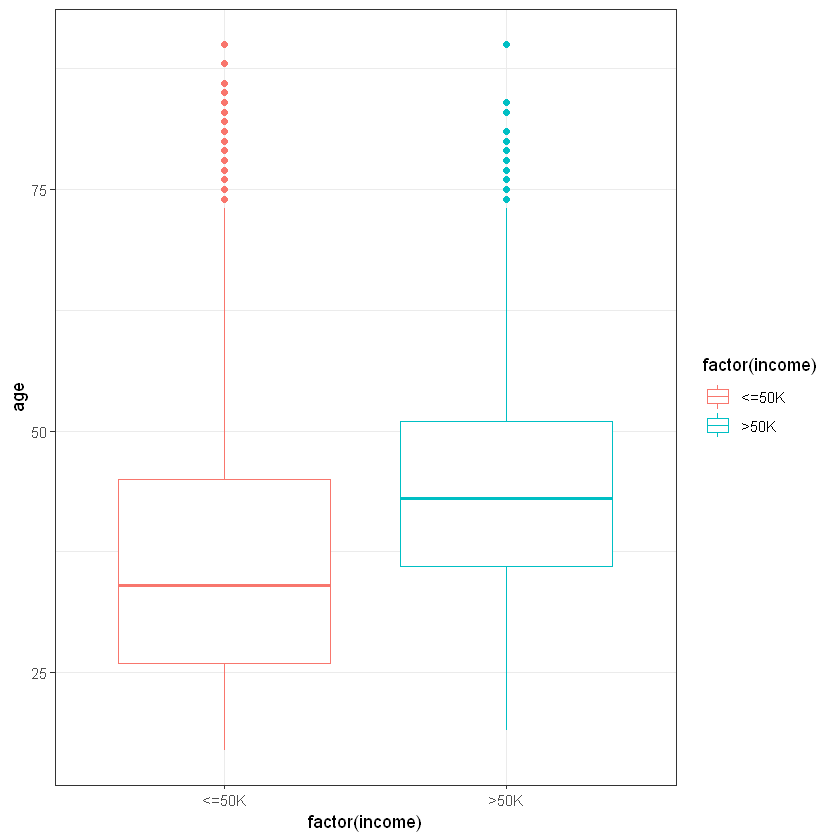

In [174]:
ggplot(adult,aes(factor(income),age)) + geom_boxplot(aes(color=factor(income))) +theme_bw()

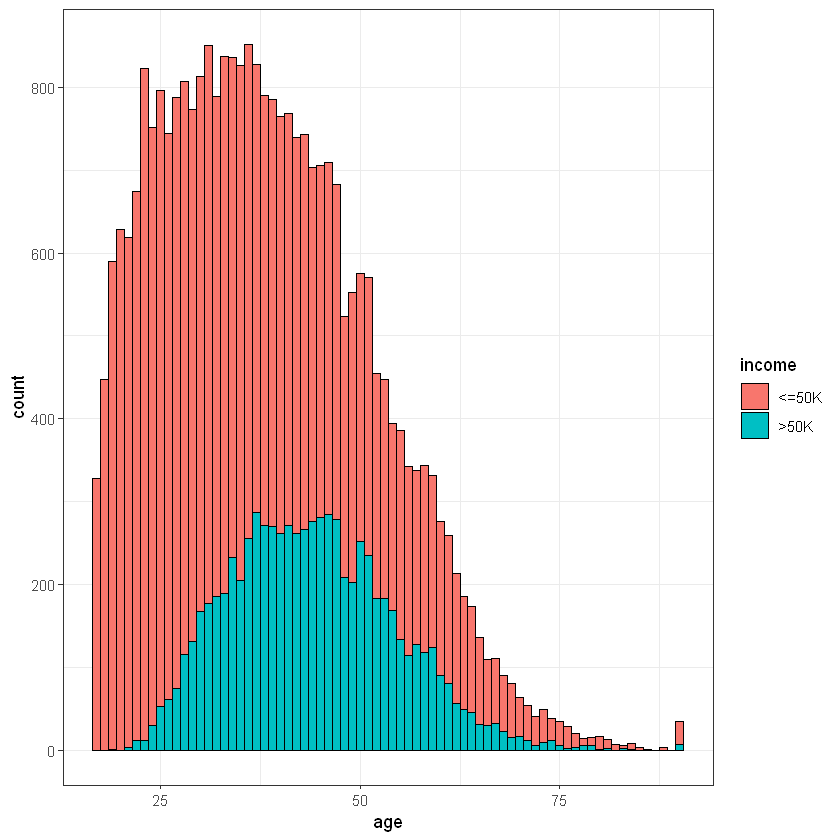

In [128]:
ggplot(adult,aes(age)) + geom_histogram(aes(fill=income),color='black',binwidth=1) + theme_bw()

# Q26:
**What is the statistically significant association between type_employer and income?**

In [161]:
tbl9<-table(adult$type_employer,adult$income)
tbl9

             
              <=50K  >50K
  SL-gov       2393   953
  self-emp     2258  1314
  Private     17390  4874
  Federal-gov   578   365
  Unemployed     14     0

**Chi-square test of independence between income and type_employer.**

In [182]:
chisq2 <- table(adult$income,adult$type_employer)
chisq.test(chisq2)

Warning message in chisq.test(chisq2):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  chisq2
X-squared = 501.26, df = 4, p-value < 2.2e-16


**As the p-value 2.2e-16 is less than the .05 significance level, we reject the null hypothesis that the income is independent of the type_employer. So the income and type_employer are statistically significantly associated.**

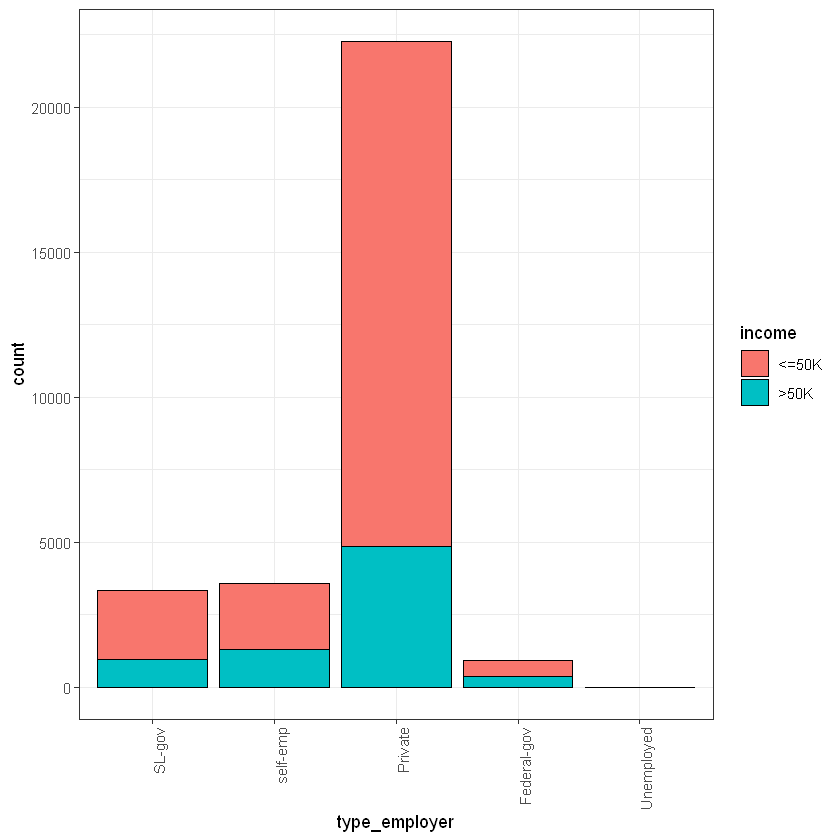

In [129]:
ggplot(adult,aes(type_employer)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q27:
**What is the statistically significant association between fnlwgt and income?**

In [170]:
agg2 <- aggregate(fnlwgt ~ income, adult , mean)
agg2
names(agg2) <- c("Income Group","Mean of Final Weight")
agg2

income,fnlwgt
<=50K,190342.1
>50K,188145.3


Income Group,Mean of Final Weight
<=50K,190342.1
>50K,188145.3


**t-test of independence between income and fnlwgt.**

In [191]:
t.test(fnlwgt ~ income, data=adult)


	Welch Two Sample t-test

data:  fnlwgt by income
t = 1.5893, df = 13246, p-value = 0.112
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -512.6189 4906.3506
sample estimates:
mean in group <=50K  mean in group >50K 
           190342.1            188145.3 


**At 5% singficance level we fail to reject the null hypothesis that there is no statistical association between mean of fnlwgt and income as the p value is 11.2%.**

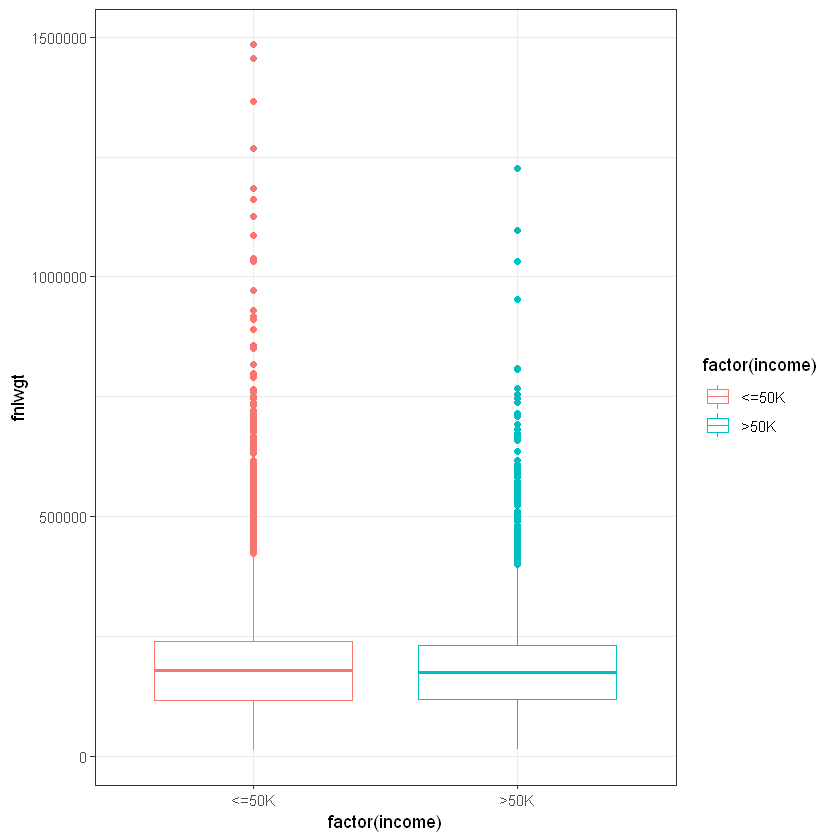

In [175]:
ggplot(adult,aes(factor(income),fnlwgt)) + geom_boxplot(aes(color=factor(income))) +theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


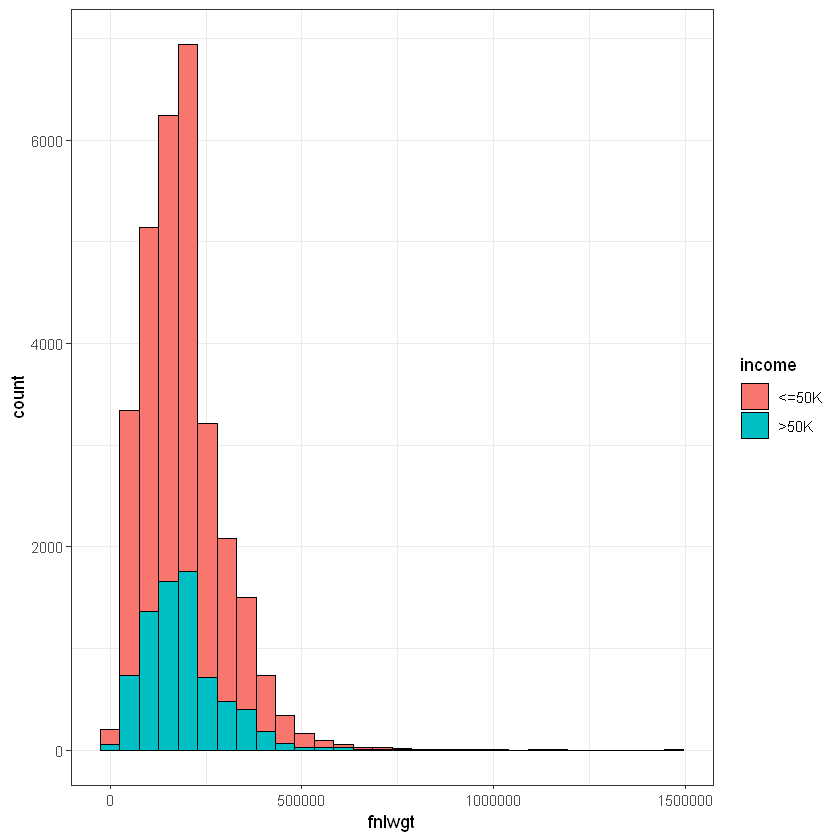

In [130]:
ggplot(adult,aes(fnlwgt)) + geom_histogram(aes(fill=income),color='black') + theme_bw()

# Q28:
**What is the statistically significant association between education and income?**

In [162]:
tbl10<-table(adult$education,adult$income)
tbl10

                
                 <=50K  >50K
  Bachelors       2916  2126
  Upto_HS_Grad   10746  1788
  Masters          708   918
  Post_HS-School  7185  2341
  UptoInter        521    35
  Doctorate         95   280
  Upto_Primary     462    18

**Chi-square test of independence between income and education.**

In [183]:
chisq3 <- table(adult$income,adult$education)
chisq.test(chisq3)


	Pearson's Chi-squared test

data:  chisq3
X-squared = 3142.4, df = 6, p-value < 2.2e-16


**As the p-value 2.2e-16 is less than the .05 significance level, we reject the null hypothesis that the income is independent of the education. So the income and education are statistically significantly associated.**

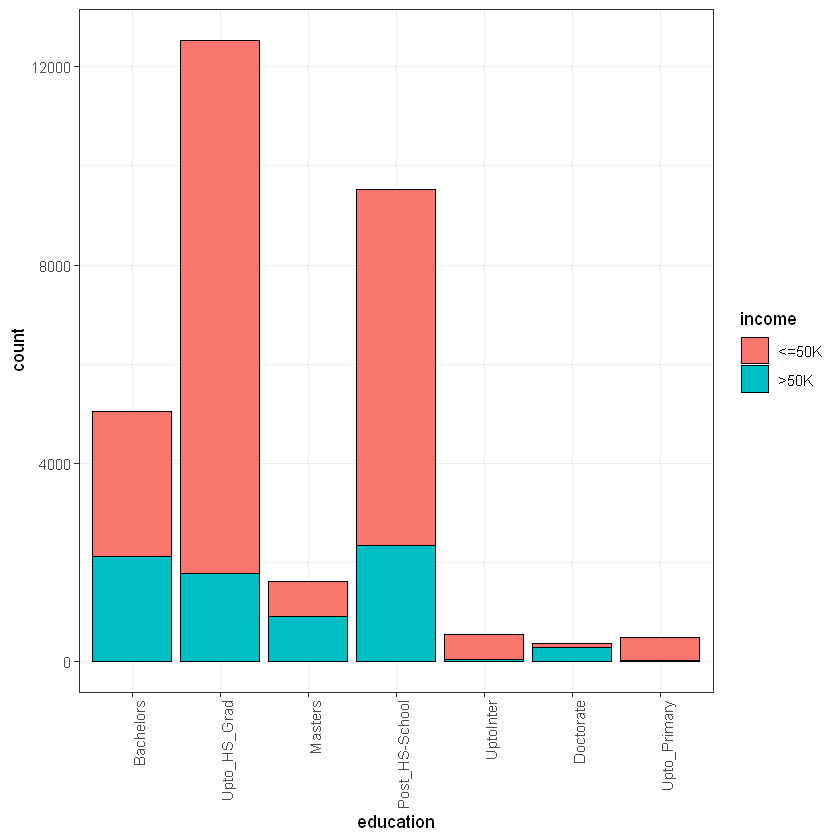

In [131]:
ggplot(adult,aes(education)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q29:
**What is the statistically significant association between education_num and income?**

In [171]:
agg3 <- aggregate(education_num ~ income, adult , mean)
agg3
names(agg3) <- c("Income Group","Mean of Education Expressed in Number")
agg3

income,education_num
<=50K,9.63023
>50K,11.60698


Income Group,Mean of Education Expressed in Number
<=50K,9.63023
>50K,11.60698


**t-test of independence between income and education_num.**

In [192]:
t.test(education_num ~ income, data=adult)


	Welch Two Sample t-test

data:  education_num by income
t = -62.374, df = 13043, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.038872 -1.914630
sample estimates:
mean in group <=50K  mean in group >50K 
            9.63023            11.60698 


**As the p-value 2.2e-16 is less than the .05 significance level, after checking Assumptions we can say there is association between mean of education_num  and  income at 5% significant level. we reject the null hypothesis that the mean income is independent of the same of education_num. So the income and education_num are statistically significantly associated.**

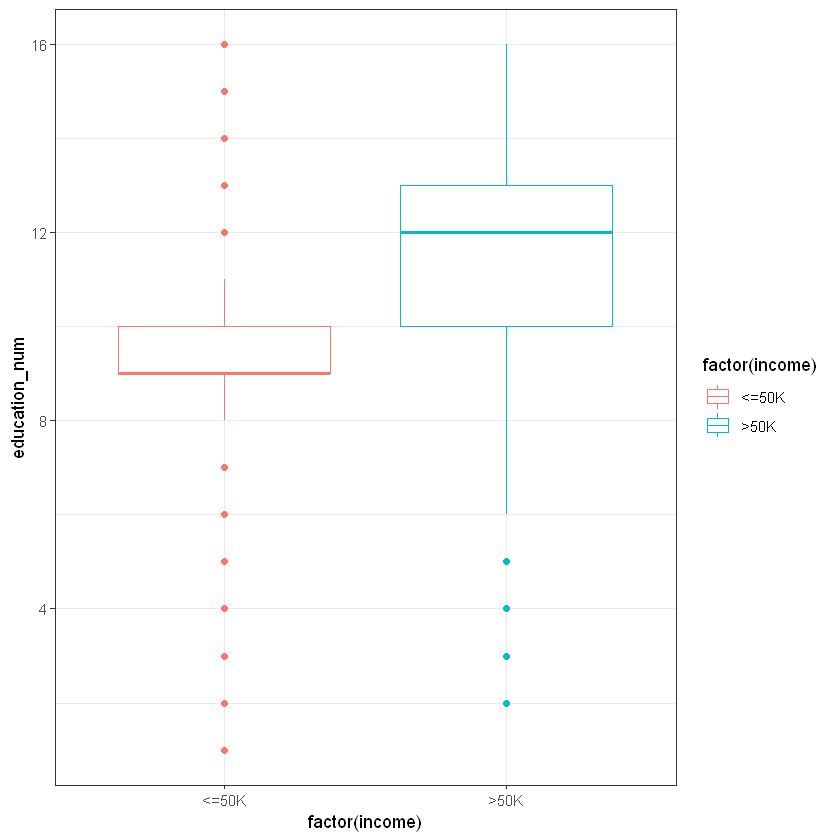

In [176]:
ggplot(adult,aes(factor(income),education_num)) + geom_boxplot(aes(color=factor(income))) +theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


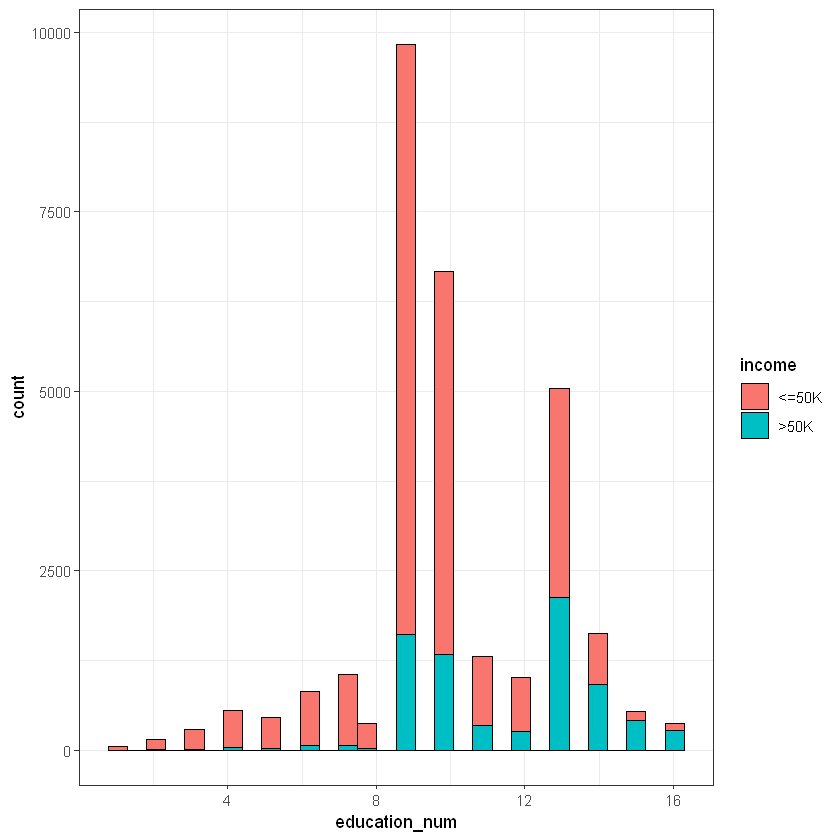

In [132]:
ggplot(adult,aes(education_num)) + geom_histogram(aes(fill=income),color='black') + theme_bw()

# Q30:
**What is the statistically significant association between marital and income?**

In [163]:
tbl11<-table(adult$marital,adult$income)
tbl11

               
                <=50K >50K
  Never-married  9241  470
  Married        8012 6438
  Not-Married    5380  598

**Chi-square test of independence between income and marital.**

In [184]:
chisq4 <- table(adult$income,adult$marital)
chisq.test(chisq4)


	Pearson's Chi-squared test

data:  chisq4
X-squared = 5783.2, df = 2, p-value < 2.2e-16


**As the p-value 2.2e-16 is less than the .05 significance level, we reject the null hypothesis that the income is independent of the marital. So the income and marital are statistically significantly associated.**

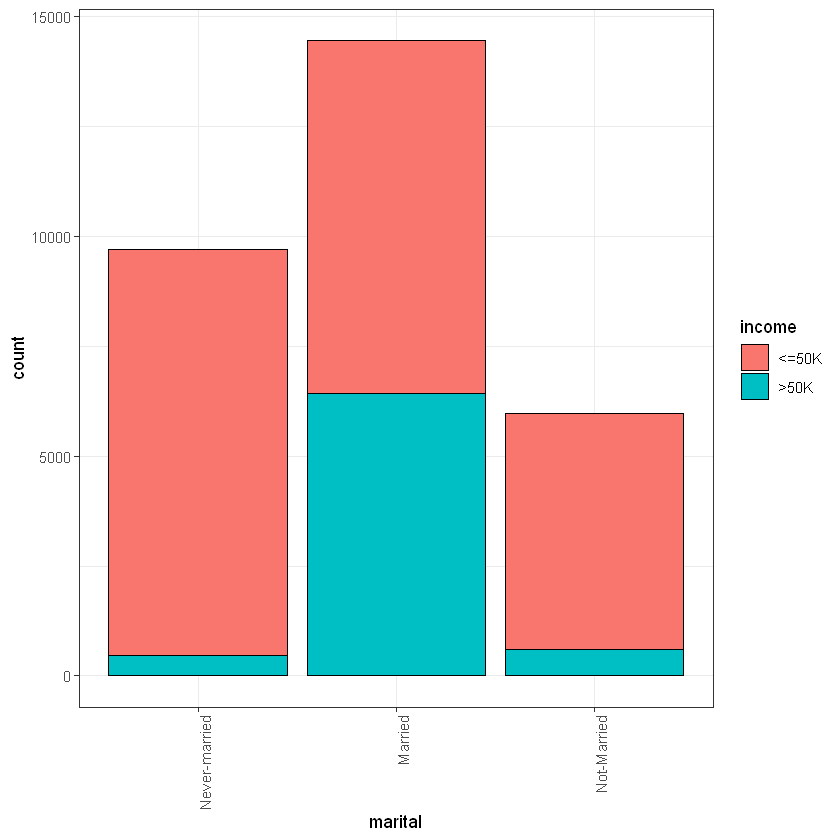

In [133]:
ggplot(adult,aes(marital)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q31:
**What is the statistically significant association between occupation and income?**

In [164]:
tbl12<-table(adult$occupation,adult$income)
tbl12

                   
                    <=50K >50K
  Adm-clerical       3221  498
  Exec-managerial    2054 1937
  Handlers-cleaners  1266   83
  Prof-specialty     2224 1810
  Other-service      3077  132
  Sales              2614  970
  Transport-moving   1253  319
  Farming-fishing     872  115
  Machine-op-inspct  1720  244
  Tech-support        633  278
  Craft-repair       3117  908
  Protective-serv     434  210
  Armed-Forces          8    1
  Priv-house-serv     140    1

**Chi-square test of independence between income and occupation.**

In [185]:
chisq5 <- table(adult$income,adult$occupation)
chisq.test(chisq5)

Warning message in chisq.test(chisq5):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  chisq5
X-squared = 3685.9, df = 13, p-value < 2.2e-16


**As the p-value 2.2e-16 is less than the .05 significance level, we reject the null hypothesis that the income is independent of the occupation. So the income and occupation are statistically significantly associated.**

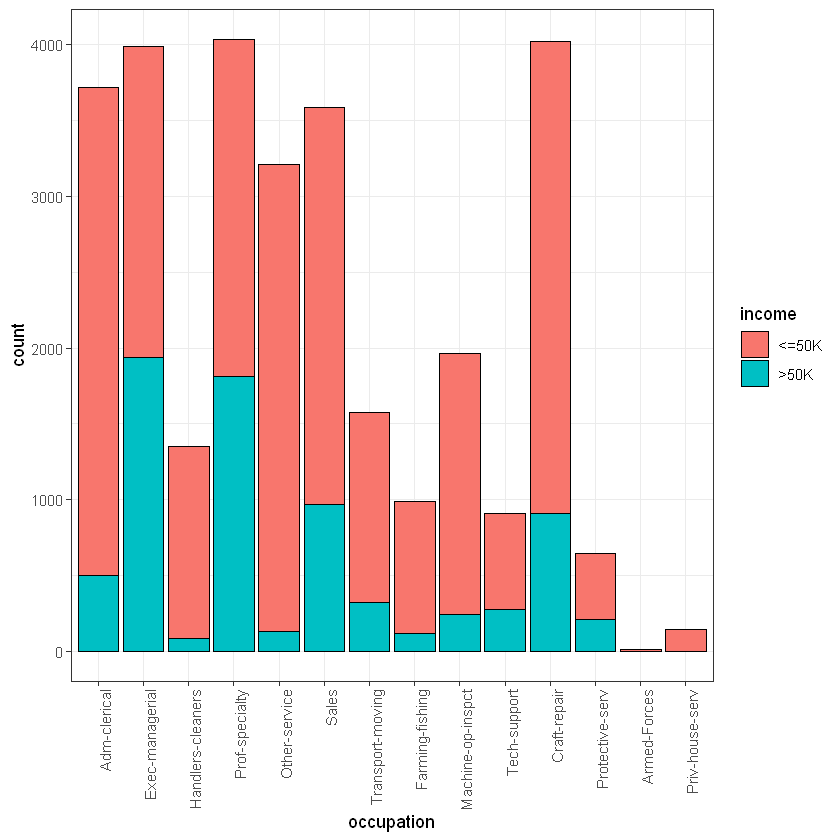

In [134]:
ggplot(adult,aes(occupation)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q32:
**What is the statistically significant association between relationship and income?**

In [165]:
tbl13<-table(adult$relationship,adult$income)
tbl13

                
                 <=50K >50K
  Husband         6780 5677
  Not-in-family   6891  823
  Other-relative   854   35
  Own-child       4398   64
  Unmarried       2998  213
  Wife             712  694

**Chi-square test of independence between income and relationship.**

In [186]:
chisq6 <- table(adult$income,adult$relationship)
chisq.test(chisq6)


	Pearson's Chi-squared test

data:  chisq6
X-squared = 6227.1, df = 5, p-value < 2.2e-16


**As the p-value 2.2e-16 is less than the .05 significance level, we reject the null hypothesis that the income is independent of the relationship. So the income and relationship are statistically significantly associated.**

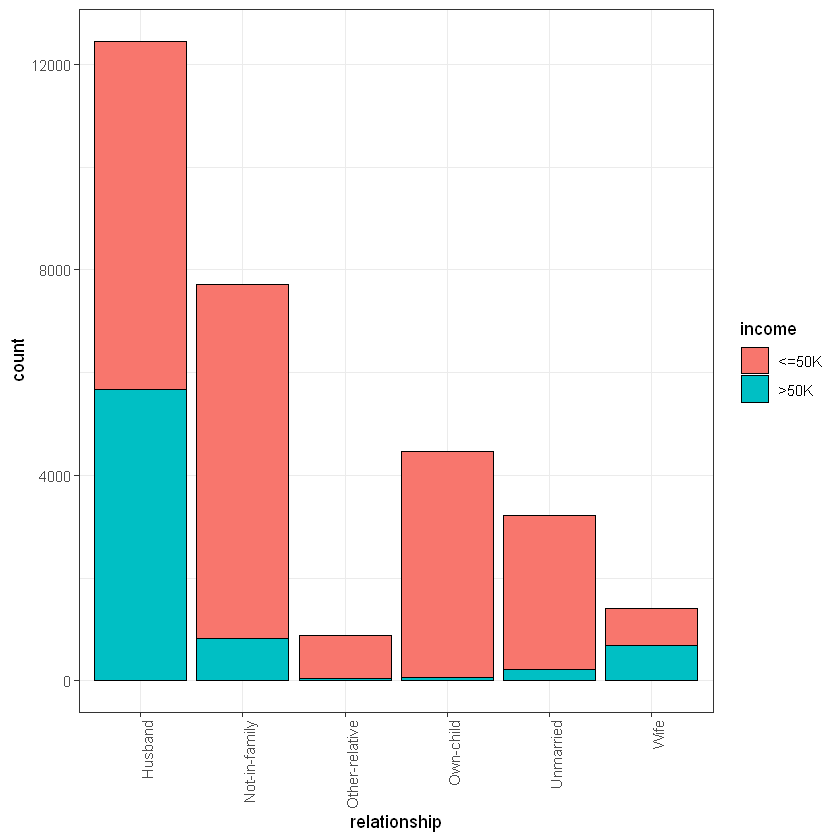

In [135]:
ggplot(adult,aes(relationship)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q33:
**What is the statistically significant association between race and income?**

In [166]:
tbl14<-table(adult$race,adult$income)
tbl14

                    
                     <=50K  >50K
  Amer-Indian-Eskimo   252    34
  Asian-Pac-Islander   646   248
  Black               2450   366
  Other                210    21
  White              19075  6837

**Chi-square test of independence between income and race.**

In [187]:
chisq7 <- table(adult$income,adult$race)
chisq.test(chisq7)


	Pearson's Chi-squared test

data:  chisq7
X-squared = 304.51, df = 4, p-value < 2.2e-16


**As the p-value 2.2e-16 is less than the .05 significance level, we reject the null hypothesis that the income is independent of the race. So the income and race are statistically significantly associated.**

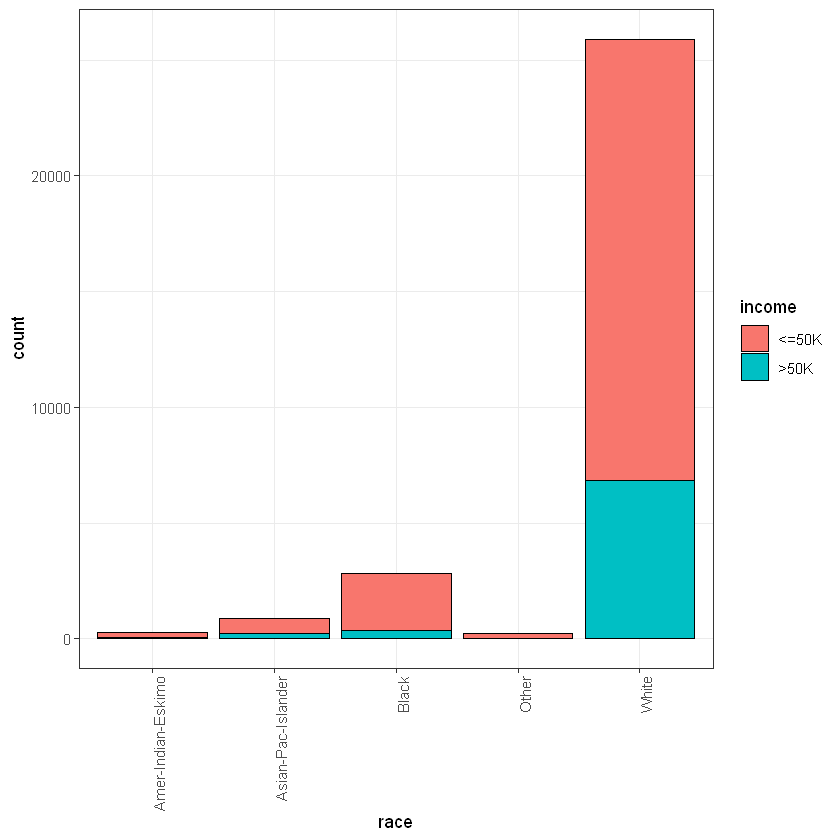

In [136]:
ggplot(adult,aes(race)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q34:
**What is the statistically significant association between sex and income?**

In [167]:
tbl15<-table(adult$sex,adult$income)
tbl15

        
         <=50K  >50K
  Female  8661  1112
  Male   13972  6394

**Chi-square test of independence between income and sex.**

In [188]:
chisq8 <- table(adult$income,adult$sex)
chisq.test(chisq8)


	Pearson's Chi-squared test with Yates' continuity correction

data:  chisq8
X-squared = 1413.8, df = 1, p-value < 2.2e-16


**As the p-value 2.2e-16 is less than the .05 significance level, we reject the null hypothesis that the income is independent of the sex. So the income and sex are statistically significantly associated.**

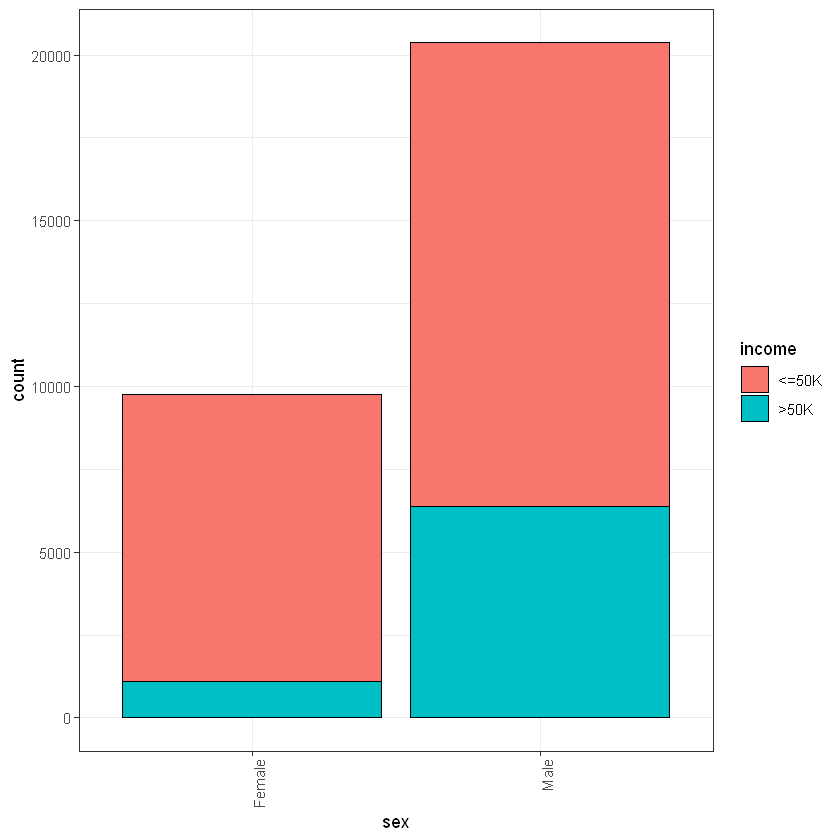

In [137]:
ggplot(adult,aes(sex)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Q35:
**What is the statistically significant association between hr_per_week and income?**

In [172]:
agg4 <- aggregate(hr_per_week ~ income, adult , mean)
agg4
names(agg4) <- c("Income Group","Mean of Hours Per Week")
agg4

income,hr_per_week
<=50K,39.35201
>50K,45.70703


Income Group,Mean of Hours Per Week
<=50K,39.35201
>50K,45.70703


**t-test of independence between income and hr_per_week.**

In [193]:
t.test(hr_per_week ~ income, data=adult)


	Welch Two Sample t-test

data:  hr_per_week by income
t = -43.17, df = 14144, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.643578 -6.066475
sample estimates:
mean in group <=50K  mean in group >50K 
           39.35201            45.70703 


**As the p-value 2.2e-16 is less than the .05 significance level, after checking Assumptions we can say there is association between mean of hr_per_week  and  income at 5% significant level. we reject the null hypothesis that the mean income is independent of the same of hr_per_week. So the income and hr_per_week are statistically significantly associated.**

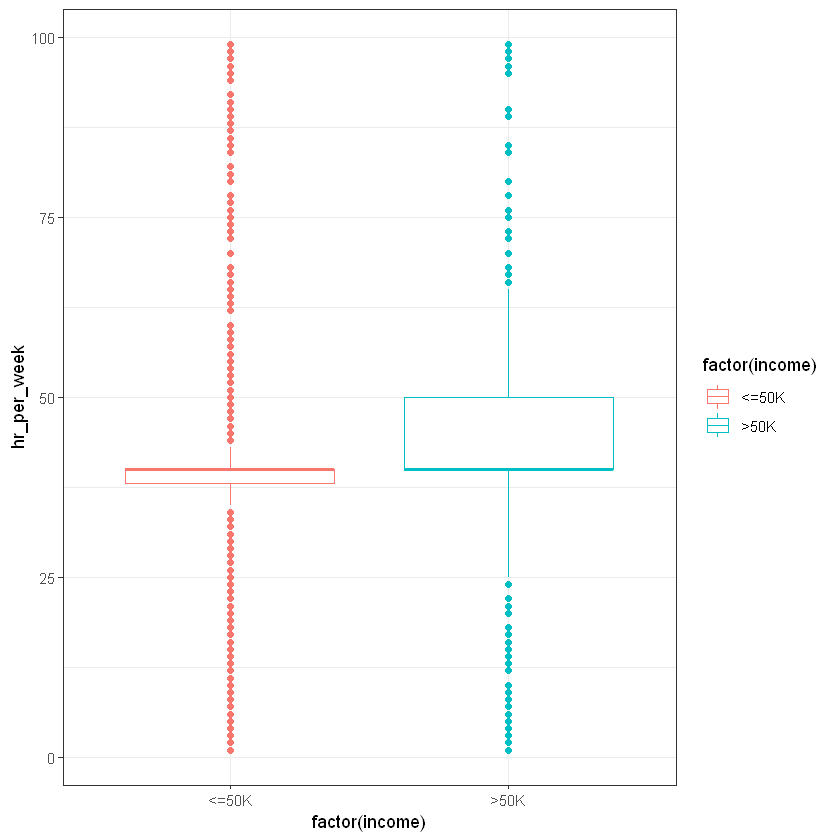

In [179]:
ggplot(adult,aes(factor(income),hr_per_week)) + geom_boxplot(aes(color=factor(income))) +theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


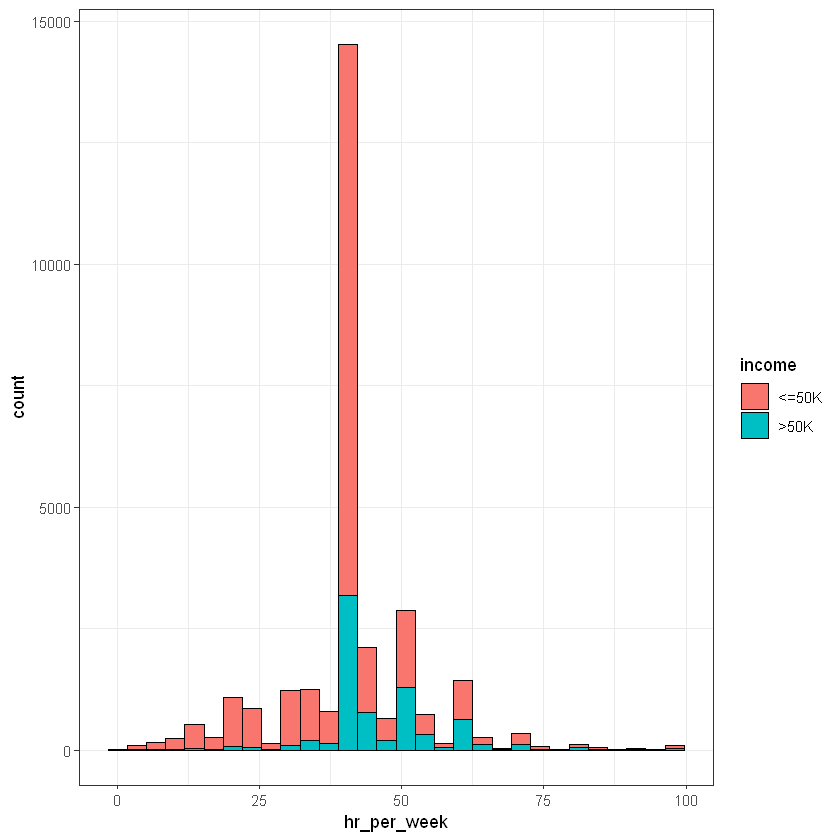

In [138]:
ggplot(adult,aes(hr_per_week)) + geom_histogram(aes(fill=income),color='black') + theme_bw()

# Q36:
**What is the statistically significant association between region and income?**

In [168]:
tbl16<-table(adult$region,adult$income)
tbl16

                         
                          <=50K  >50K
  North.America           20662  7041
  Latin.and.South.America  1139    99
  Asia                      431   203
  Europe                    344   149
  Other                      57    14

**Chi-square test of independence between income and region.**

In [189]:
chisq9 <- table(adult$income,adult$region)
chisq.test(chisq9)


	Pearson's Chi-squared test

data:  chisq9
X-squared = 218.75, df = 4, p-value < 2.2e-16


**As the p-value 2.2e-16 is less than the .05 significance level, we reject the null hypothesis that the income is independent of the region. So the income and region are statistically significantly associated.**

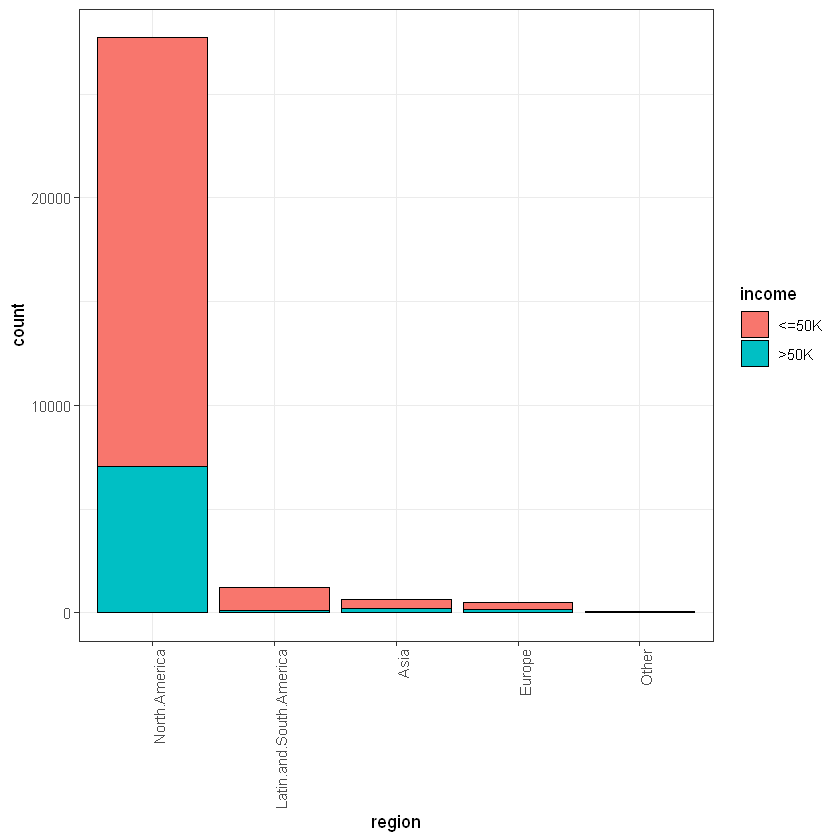

In [139]:
ggplot(adult,aes(region)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Building Logistic Regression Model

**Now it's time to build a model to classify people into two groups: Above or Below 50k in income.**

# Logistic Regression
**Logistic Regression is a type of classification model. In classification models, we attempt to predict the outcome of categorical dependent variables, using one or more independent variables. The independent variables can be either categorical or numerical.**

**Logistic regression is based on the logistic function, which always takes values between 0 and 1. Replacing the dependent variable of the logistic function with a linear combination of dependent variables we intend to use for regression, we arrive at the formula for logistic regression.**

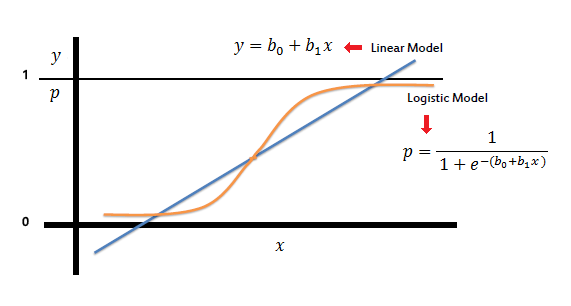

**Let us take a quick look at the head() of adult to make sure we have a good overview before going into building the model!**

In [140]:
head(adult, 10)

age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
38,Private,215646,Upto_HS_Grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
53,Private,234721,Upto_HS_Grad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K
49,Private,160187,Upto_HS_Grad,5,Married,Other-service,Not-in-family,Black,Female,0,0,16,Latin.and.South.America,<=50K
52,self-emp,209642,Upto_HS_Grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,North.America,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,North.America,>50K
42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,North.America,>50K


# Train Test Split

**Let us split the data into a train and test set using the caTools library.**

In [150]:
adult$income <- sapply(adult$income,factor)

In [151]:
# Install and Import Library

install.packages("caTools")

library(caTools)

set.seed(101) 

# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(adult$income, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train = subset(adult, sample == TRUE)

# Testing Data
test = subset(adult, sample == FALSE)

Warning message:
"package 'caTools' is in use and will not be installed"

# Training the Model
**Let us explore the glm() function with help(glm).**

**Let us use all the features to train a glm() model on the training data set, pass the argument family=binomial(logit) into the glm function.**

**The warning just means that the model may have guessed the probability of a class with a 0% or 100% chance of occuring.**

In [152]:
model <- glm(formula=income ~ .,
            family = binomial(logit),
            data = train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

**Let us check the model summary.**

In [153]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1213  -0.5153  -0.1968  -0.0077   3.8665  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -8.954e+00  5.044e-01 -17.750  < 2e-16 ***
age                            2.782e-02  2.009e-03  13.850  < 2e-16 ***
type_employerself-emp         -1.733e-02  9.049e-02  -0.192 0.848086    
type_employerPrivate           2.144e-01  7.288e-02   2.941 0.003269 ** 
type_employerFederal-gov       7.436e-01  1.238e-01   6.007 1.89e-09 ***
type_employerUnemployed       -1.167e+01  1.475e+02  -0.079 0.936919    
fnlwgt                         7.714e-07  2.122e-07   3.634 0.000279 ***
educationUpto_HS_Grad          1.089e-01  1.190e-01   0.915 0.360109    
educationMasters              -3.047e-02  9.557e-02  -0.319 0.749846    
educationPost_HS-School        1.244e-02  8.077e-02   0.154 0.877619

**We have still a lot of features! Some important, some not so much. The ones with mark of three stars ( * * * ) are the most important and relevant ones.**

# Q37:
**What is the confusion matrix for the model?**

**Let us create a confusion matrix using the predict function with type='response' as an argument inside of that function.**

In [154]:
test$predicted.income = predict(model, newdata=test, type="response")

confusion <- table(actual=test$income, predicted=test$predicted.income > 0.5)

confusion

       predicted
actual  FALSE TRUE
  <=50K  6293  497
  >50K    868 1384

# Q38:
**What was the accuracy of our model?**

**With respect to the confusion matrix, the accuracy is the sum of "true negative" and "true positive" over the sum of all the data of the confusion matrix. It actually denotes the ratio of correct prediction.**

In [155]:
accuracy <- (confusion[[1,1]] + confusion[[2,2]])/sum(confusion)

In [156]:
accuracy

[1] 0.8490378

# Q39:
**What is the misclassification error of the model?**

**Misclassification error is actually the proportion of incorrect classification (summation of false positive and flase negative) to total of all data points and it can be calculated by subtracting the accuracy from 1.**

In [157]:
misclassError <- 1 - accuracy

In [158]:
misclassError

[1] 0.1509622

# Q40:
**How good is our model?**

**I would Not like to draw right/wrong answers here, I just worked on  accuracy and misclassification but there are other measures like precision and recall. We would like to know the costs associated with each before deciding whether the model is good enough for our purpose or not.**

# Conclusion
**In this project we went through the process of importing, cleaning and analyzing the dataset before we went ahed to build our model and evaluate the performance of the model against test dataset.**

**We could gather some ideas about how to do it step by step and also came to know how to tackle different issues that occured during our journey. Having said that more rigorous analysis with fine tuning of the various parameters must be conducted before we can consider the model as an optimized ones.**

In [194]:
str(adult)

'data.frame':	30139 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 5 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 7 levels "Bachelors","Upto_HS_Grad",..: 1 1 2 2 1 3 2 2 3 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 2 3 3 4 2 5 2 4 2 ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : num  40 13 40 40 40 40 16 45 50 40 ...
 $ region       : Factor w/ 5 levels "North.America",..: 1 1

In [195]:
head(adult)

age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
38,Private,215646,Upto_HS_Grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
53,Private,234721,Upto_HS_Grad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K
